#  **Ma mission**

#### Analyser un jeu de données afin de d'infomer le projet d'expansion de l'entreprise et de déterminer les pays à fort potentiel.

Pour réaliser cette mission, j'ai à ma disposition ce [jeu données](https://datacatalog.worldbank.org/search/dataset/0038480).

# Plan de travail :
* Importation des données 
* Partie 1 : Nettoyage des données
* Partie 2 : Exploration des données
* Partie 3 : Idendification des pays à fort potentiel
* Conclusion

# Importation des données

Je commence par importer les librairies python qui me seront utiles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Chargemment des données**

Je charge les jeux de données : puisqu'il y a plusieurs fichiers, je vais les charger les unes après les autres et ensuite et procéder à des vérifications.

### **EdStatsCountry.csv**

In [2]:
country = pd.read_csv("EdStatsCountry.csv")
country.describe

<bound method NDFrame.describe of     Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Curren

On peut noter la présence de la colonne "Unnamed: 31" qui ne renferme aucune valeur. On peut donc la supprimer.

In [3]:
country.drop(["Unnamed: 31"], axis=1, inplace=True)

In [4]:
country.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   
2     Budgetary central government  General Data Dissemination System (GDDS)   
3     Budgetary central government  General Data Dissemination System (GDDS)   
4                              NaN                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  
0                    NaN            2012.0                          NaN  
1                    NaN            2012.0                         2000  
2                    NaN               NaN                         2005  
3                 2010.0            2012.0                         2006  
4                    NaN            2006.0                          NaN  

[5 rows x 31 columns]

In [5]:
#Je vérifie la taille de mon tableau
country.shape

(241, 31)

country présente 241 lignes qui correspondent à 241 pays ou Etat.
Cependant, il n'existe que 197 Etats dans le monde (reconnue par l'ONU). Pourquoi cette différence ?

In [6]:
# Affichons l'ensemble des pays représentés sous forme de liste
liste_country = country["Short Name"].tolist()
print(liste_country)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)', 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Ecuador', 'Egypt', 'Euro area', 'Eritrea', 'Spain', 'Estonia', 'E

En observant cette liste, on s'apperçoit qu'il y a un certain nombre de noms qui correspondent à des zones (comme East Asia & Pacific). 
On peut aussi remarquer que certains pays sont des subdivisions d'autres pays. Comme par exemple : St Martin, Isle of Man, Polynésie Française, etc.

**Combien de pays et subdivisions de pays contient donc le dataframe country?**

In [7]:
# Je crée une liste, zones, contenant uniquement les regions geographiques
zones = country["Region"].unique()

zones = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',
         'East Asia & Pacific (all income levels)',
         'Euro area',
         'European Union'
         'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',
         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)',
         'Middle East & North Africa (developing only)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World',
        ]

In [8]:
# J'affiche la liste des pays en excluant ceux compris dans la liste "zones"

liste_pays = country[~country['Short Name'].isin(zones)]['Short Name'].unique().tolist()
print(liste_pays)
len(liste_pays)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greec

219

**Le dataframe contient 219 pays**

#### Quelles autres informations renferme cette dataframe ?

In [9]:
# J'affiche les titres de toutes les colonnes pour avoir une idée de ce quelles renferment comme informations

country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

EdStatsCountry.csv renferme des informations globales sur l'économie de chaque pays du monde : monnaie, revenus, dépenses... <br>
Elle renferme aussi la répartition des pays par région geographique.

##### Proportion de pays par région



In [10]:
# Je regroupe les villes par région
country.groupby("Region")[["Short Name"]].count().reset_index().sort_values(by="Short Name")

Region  Short Name
4               North America           3
5                  South Asia           8
3  Middle East & North Africa          21
0         East Asia & Pacific          36
2   Latin America & Caribbean          41
6          Sub-Saharan Africa          48
1       Europe & Central Asia          57

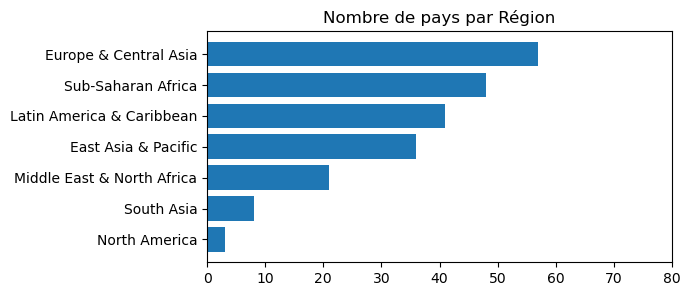

In [11]:
plt.figure(figsize=(6,3))
plt.barh(y = country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'], width = country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par Région')
plt.xlim(0, 80)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.show()

L'Europe et l'asie central sont les régions où il y a le plus de pays. Mais les régions d'Asie du sud et de l'Est sont des régions où la population est très importante car, c'est dans ces régions que se trouve la Chine et l'Inde.

#### **EdStatsCountry-Series**

In [12]:
Country_Series = pd.read_csv("EdStatsCountry-Series.csv")
Country_Series.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [13]:
Country_Series.shape

(613, 4)

Nous avaons 613 lignes, repartis sur 3 variables. <br>
Ce tableau (Country_Series) présente les différentes sources de données utilisées pour avoir les informations contenues dans EdStatsCountry.csv. Les sources de données étant multiples, on a donc plusieurs lignes pour chaque pays (soit 613).

In [14]:
# Je vérifie que le nombre de pays présent dans ce dataframe correspond au nombre de pays que nous avions dans le fichier EdStatsCountry.csv
Country_Series["CountryCode"].nunique()

211

Nous avons 211 pays. Ce chiffre ne correspond pas au nombre de pays que nous avions précédemment (219). D'où vient cette différence ?

In [15]:
# A partir de la dataframe country précédente, je recherche les pays qui ne sont pas présents dans la dataframe Country_Series

country[~country['Country Code'].isin(Country_Series['CountryCode'].unique())][['Short Name']]

Short Name
5                                        Arab World
47                                          Curaçao
57            East Asia & Pacific (developing only)
58          East Asia & Pacific (all income levels)
59          Europe & Central Asia (developing only)
60        Europe & Central Asia (all income levels)
63                                        Euro area
68                                   European Union
89                                      High income
92           Heavily indebted poor countries (HIPC)
116     Latin America & Caribbean (developing only)
122   Latin America & Caribbean (all income levels)
123    Least developed countries: UN classification
124                                      Low income
127                             Lower middle income
128                             Low & middle income
134                        St. Martin (French part)
140  Middle East & North Africa (all income levels)
143                                   Middle income
148    Middle East & North Africa (developing only)
157                                   North America
166                                           Nauru
168                                    OECD members
187                                      South Asia
198            Sub-Saharan Africa (developing only)
199                                     South Sudan
200          Sub-Saharan Africa (all income levels)
207                       Sint Maarten (Dutch part)
225                             Upper middle income
234                                           World

Dans cette liste, on ne retrouve pas les regroupements de pays et certains pays qui étaient présents dans EdStatsCountry.csv. Ces pays absents sont : Curaçao, Saint Martin (partie française), Nauru, Soudan du Sud, Saint martin (partie allemande).

#### **EdStatsData.csv**

In [16]:
Data = pd.read_csv("EdStatsData.csv")
Data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [17]:
Data.shape

(886930, 70)

Data présente l'évolution des données années après années. Elle renferme aussi des données prospectives.

In [18]:
Data.duplicated(subset=None, keep=False).unique()

array([False])

Il n'y a pas de doublon, mais beaucoup de données manquantes.

In [19]:
# Quelles informations renferme la colonne Indicator Name ?
Data["Indicator Name"].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

Data présente l'évolution des données années après années de 1970 à 2100. On y retrouve des données retrospectives et prospective. Elle contient notamment les taux de scolarisation et d'alphabétisation des jeunes.

In [20]:
# Combien de pays son présent dans cette dataframe ?

Data["Country Name"].nunique()

242

On a la même problématique qu'avec la première dataframe (country), soit 242 pays au lieu de 219. <br> Est-ce que les zones géographiques sont prises en compte ?

In [21]:
# Pour répondre à cette question, je vais créer une liste de pays et zone géographique et la comparer à la liste obtenu précedemment

Data[~Data["Country Code"].isin(Country_Series["CountryCode"].unique())]["Country Name"].unique().tolist()

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'British Virgin Islands',
 'Curacao',
 'Nauru',
 'Sint Maarten (Dutch part)',
 'South Sudan',
 'St. Martin (French part)']

En observant cette liste, on peut se rendre compte qu'elle est identique la liste des bases de données précédente. On a donc un nombre de pays identique dans toutes nos bases de données.

#### **EdStatsFootNote**

In [22]:
FootNote = pd.read_csv("EdStatsFootNote.csv")
FootNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

La colonne Unnamed: 4 ne renferme aucune valeur, on peut la supprimer. <br> On peut également remarquer que dans la colonne year les années sont précédés des caractères YR. Or ces cellules ne sont censées contenir que des données numériques, on va donc procéder à un nettoyage

In [23]:
# Suppression de la colonne Unnamed: 4
FootNote.drop(['Unnamed: 4'], axis=1, inplace=True)

In [24]:
FootNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.

Nettoyage des valeurs de la colonne Year.

In [25]:
FootNote["Year"]

0         YR2001
1         YR2005
2         YR2000
3         YR2004
4         YR2006
           ...  
643633    YR2007
643634    YR2014
643635    YR2015
643636    YR2017
643637    YR2017
Name: Year, Length: 643638, dtype: object

In [26]:
# Affichons toutes les valeurs de cette colonne 
FootNote["Year"].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [27]:
# En observant le tableau ci-dessus, on peut s'appercevoir que l'année 2012 semble être en double. Vérifions cela
doublons = FootNote.duplicated()
print(doublons)

0         False
1         False
2         False
3         False
4         False
          ...  
643633    False
643634    False
643635    False
643636    False
643637    False
Length: 643638, dtype: bool


Il n'existe pas de doublons dans ce jeu de données, on peut donc procéder directement au nettoyage.

In [28]:
FootNote["Year"] = FootNote["Year"].str.replace("YR", "")
FootNote["Year"] = FootNote["Year"].str.replace("yr", "")
FootNote.head()

CountryCode      SeriesCode  Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  2004  Country estimation.
4         ABW     SE.PRE.TCHR  2006  Country estimation.

In [29]:
FootNote["Year"].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

Notre colonne année est plus correcte. Et on peut se rendre compte que les années présent ici sont les mêmes que dans les jeux de données précédent. <br> Cependant, quelles informations renferment la colonne "description"?

In [30]:
FootNote["DESCRIPTION"].unique().tolist()

['Country estimation.',
 'UIS Estimation',
 'UNESCO Institute for Statistics (UIS) estimate',
 '5-year average value between 0s and 5s',
 'Percentage includes lower secondary education.',
 'Country data',
 'Country Data',
 'UNSD WPP08 revision file 2A and 3A.',
 'Not applicable',
 'Percentage includes all tertiary levels (ISCED 5-8)',
 'Estimated',
 'UIS estimation.',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Country estimation',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 9

#### En observant la colonne description, on peut conclure que le jeu de données EdStatsFootNote nous renseigne sur l'année d'origine des données ainsi que les limites d'incertitudes.

#### EdStatsSeries.csv

In [31]:
Series = pd.read_csv("EdStatsSeries.csv")
Series.head(3)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  

[3 rows x 21 columns]

In [32]:
Series.shape

(3665, 21)

Cette dataframe contient 3665 lignes, mais nous avons à nouveau une colonne ne renfermant aucune information. Supprimons là.

In [33]:
Series.drop(['Unnamed: 20'], axis=1, inplace=True)

In [34]:
Series.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN                NaN   
2         NaN         NaN         NaN                NaN   
3         NaN         NaN         NaN                NaN   
4         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   
2                        NaN                         NaN              NaN   
3                        NaN                         NaN              NaN   
4                        NaN                         NaN              NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type  
0                  NaN              NaN                 NaN           NaN  
1                  NaN              NaN                 NaN           NaN  
2                  NaN              NaN                 NaN           NaN  
3                  NaN              NaN                 NaN           NaN  
4                  NaN              NaN                 NaN           NaN

Ce jeu de donées renferme beaucoup de données manquantes. Quels est le nombre de données manquantes ? Ce jeu est-il exploitable ?

In [35]:
Series.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
dtype: int64

Nous avons 5 colonnes pour lesquelles il manque toutes les valeurs et 10 autres colonnes où il manque plus de 50% des valeurs.<br> En l'état, ce jeu de données n'est pas pertinent

#### Résumé du nettoyage de données

- Country : EdStatsCountry.csv contient des informations globales sur l'économie de chaque pays du monde certaines valeurs manquent pour de nombreux pays, parfois la majorité des pays. Aucun doublon 
<br>

- Country Series : EdStatsCountry-Series.csv contient la source des données des informations contenues dans EdStatsCountry.csv. Les valeurs manquantes correspondent à la colonne "Unnamed: 3" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon 
<br>

- Data : EdStatsData.csv donne l'évolution de plusieurs indicateurs pour tous les pays du monde et macro régions du monde: Beaucoup de valeurs manquantes, dans le même ordre de grandeur pour toutes les années, il y a potentiellement certains indicateurs pour lesquels des données manquent. on remarque qu'il y a exactement le même nombre de valeurs manquantes pour les années >= 2020. Aucun doublon 
<br>

- Footnote : footnote donne des informations sur année d'origine des données et description des données. Les valeurs manquantes correspondent à la colonne "Unnamed:4" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon
<br>

- Series : Series donne des données descriptives sur les indicateurs socio économiques disponibles dans data. 6 colonnes pour lesquelles il manque toutes les valeurs et qu'on pourrait supprimer (dont Unnamed: 20). Il manque plus de 80 % des valeurs pour 10 autres colonnes. et près de 50 % des valeurs pour la colonne "short definition". Aucun doublon

#### Bilan

La base de données (constitué de l'ensemble des jeux de données importées) comporte des données éducatives de tous les pays du monde. Il semble y avoir un nombre important de données par pays pour procéder à des analyses comparatives.

Les jeux de données qui apparaissent les plus pertinents sont par ordre de priorité sont : <br>
- EdsStatData (Data)
- EdsStatsCountry (country)
- Et EdStatsFootNote (FootNote)
<br>Pour l'exploration et l'analyse des données, nous retiendrons les fichiers Data et country

# Exploration des données

### Nettoyage des années sur dataset data

##### Voyons comment se présente les colonnes contenant les dates

In [36]:
# J'affiche à nouveau les colonnes de Data
Data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

De 1970 à 2017, les données ont été collectées année après année, mais à partir de 2017, les données ont été collectées tous les 5 ans. <br> Nous avons précédemment vu que ce jeu de données contenait beaucoup de valeur manquante. Pour réduire l'impact de ce manque de données et optimiser notre analyse, on peut regrouper les années en classe (par décennie).

In [37]:
# Je regroupe les années en décennie. Mais avant je crée une copie du dataframe
Data_copy = Data.copy()

In [38]:
Data['1970s'] = Data[[str(year) for year in range(1970,1980,1)]].mean(1)
Data['1980s'] = Data[[str(year) for year in range(1980,1990,1)]].mean(1)
Data['1990s'] = Data[[str(year) for year in range(1990,2000,1)]].mean(1)
Data['2000s'] = Data[[str(year) for year in range(2000,2010,1)]].mean(1)
Data['2010s'] = Data[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
Data['2020s'] = Data[[str(year) for year in [2020,2025]]].mean(1)
Data['2030s'] = Data[[str(year) for year in [2030,2035]]].mean(1)
Data['2040s'] = Data[[str(year) for year in [2040,2045]]].mean(1)
Data['2050s'] = Data[[str(year) for year in [2050,2055]]].mean(1)
Data['2060s'] = Data[[str(year) for year in [2060,2065]]].mean(1)
Data['2070s'] = Data[[str(year) for year in [2070,2075]]].mean(1)
Data['2080s'] = Data[[str(year) for year in [2080,2085]]].mean(1)
Data['2090s'] = Data[[str(year) for year in [2090,2095]]].mean(1)
Data['2100s'] = Data[[str(2100)]].mean(1)
Data.head(2)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F   NaN   

   1971  1972  1973  1974  1975  ...  2010s  2020s  2030s  2040s  2050s  \
0   NaN   NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN   
1   NaN   NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN   

   2060s  2070s  2080s  2090s  2100s  
0    NaN    NaN    NaN    NaN    NaN  
1    NaN    NaN    NaN    NaN    NaN  

[2 rows x 84 columns]

In [39]:
# Je supprime les colonnes d'années non agrégées
Data.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)
Data.head(2)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name Indicator Code  1970s  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2    NaN   
1  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F    NaN   

   1980s  1990s  2000s  2010s  2020s  2030s  2040s  2050s  2060s  2070s  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   2080s  2090s  2100s  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN

Pour une meilleure visualition et compréhension, nous allons représenter ces données sous forme de figure

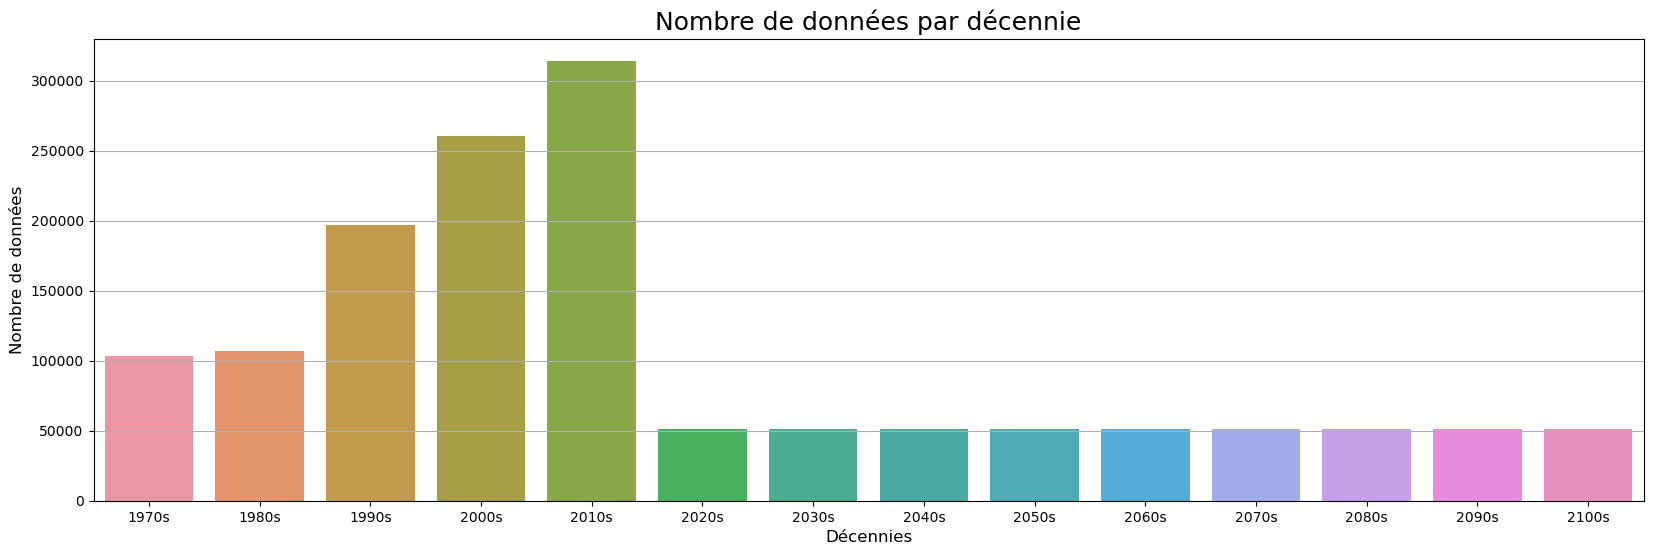

In [40]:
# Nombre de données par décennie
plt.figure(figsize=(20, 6))
plt.title("Nombre de données par décennie", fontsize=18)
sns.barplot(y = Data.shape[0] - Data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().values, x = Data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].sum().index)
plt.xlabel("Décennies", fontsize=12)
plt.ylabel("Nombre de données", fontsize=12)
plt.grid(axis="y")
plt.show()

Les années 2010s sont celles pour lesquelles on a le plus de données significatives (ou le moins de valeurs manquantes), suivi de la décennie 2000. <br> Pour la suite de notre analyse, je vais retenir uniquement la décenie la plus importante (2010s).

Je regroupe les deux dataset retenus pour l'analyse des données.

In [41]:
Data_country = Data.merge(right = country[["Country Code", "Region"]], on="Country Code", how="left")
Data_country.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970s  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2    NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F    NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI    NaN   

   1980s  1990s  2000s  2010s  2020s  2030s  2040s  2050s  2060s  2070s  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   2080s  2090s  2100s Region  
0    NaN    NaN    NaN    NaN  
1    NaN    NaN    NaN    NaN  
2    NaN    NaN    NaN    NaN

In [42]:
# Je peux simplifier ce dataframe en ne conservant que la décennie 2010s 
Data_reduit = Data_country[["Country Name", "Country Code", "Indicator Name", "Indicator Code", "2010s", "Region"]]
Data_reduit.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  2010s  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2    NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F    NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI    NaN   

  Region  
0    NaN  
1    NaN  
2    NaN

### Idendification des indicateurs exploitables

Quelles est le nombre de données par indicateur pour la décennie 2010

In [43]:
Data_reduit[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False)

2010s
Indicator Name                                           
Population, total                                     240
Population growth (annual %)                          240
GDP per capita (current US$)                          229
GDP at market prices (current US$)                    229
Internet users (per 100 people)                       229
...                                                   ...
EGRA: Listening Comprehension - Share of studen...      0
EGRA: Correct Letter Sounds Read Per Minute (Me...      0
SACMEQ: Mean performance on the reading scale, ...      0
SACMEQ: Mean performance on the reading scale, ...      0
EGRA: Correct Letter Names Read Per Minute (Mea...      0

[3665 rows x 1 columns]

Une visualisation graphique permettra de mieux comprendre ce dataframe

C:\Users\alain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

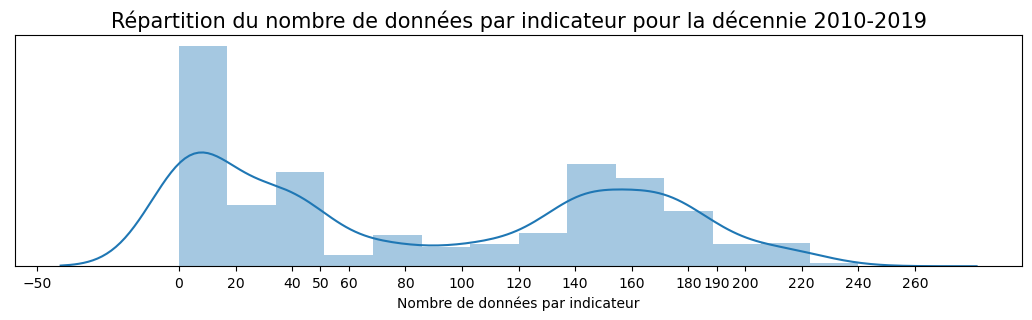

In [44]:
plt.figure(figsize=(13,3))
plt.title('Répartition du nombre de données par indicateur pour la décennie 2010-2019', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
sns.distplot(Data_reduit[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False), hist=True, kde=True, )
plt.xticks([-50, 0, 20, 40, 50, 60, 80, 100, 120, 140, 160, 180, 190, 200, 220, 240, 260])
plt.plot()

Text(0, 0.5, '')

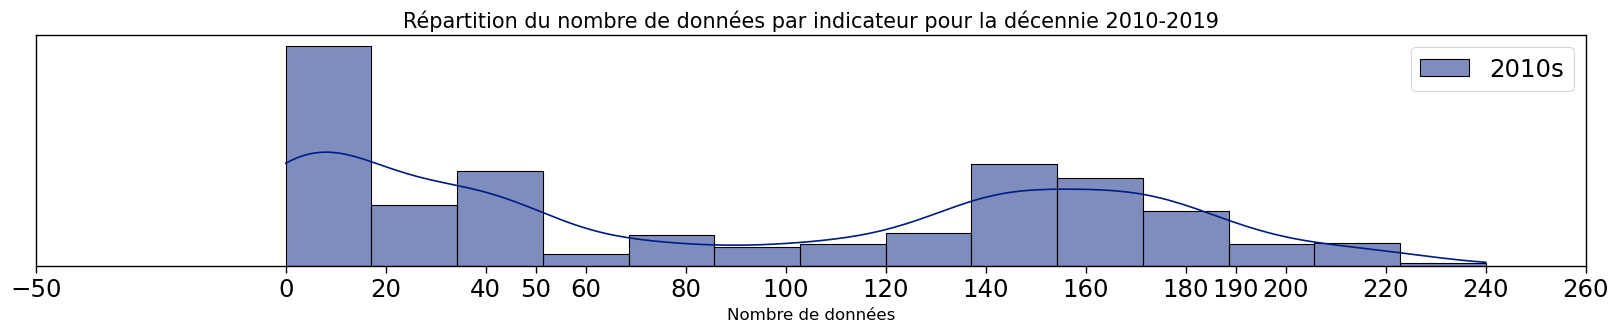

In [103]:
# représentation graphique du nombre de données par indicateur pour la décennie 2010s
plt.figure(figsize =(20, 3))
plt.title("Répartition du nombre de données par indicateur pour la décennie 2010-2019", size=15)
sns.histplot(Data_reduit[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s', ascending=False), kde=True)
ax = plt.gca()
ax.set_yticks([])
plt.xticks([-50, 0, 20, 40, 50, 60, 80, 100, 120, 140, 160, 180, 190, 200, 220, 240, 260])
plt.xlabel("Nombre de données", size=12)
plt.ylabel("")

On peut observer deux pics sur ces deux figures : <br>
- Nous avons plusieurs indicateurs avec un nombre de données inférieur à 50
- Mais également plusieurs indicateurs avec un nombre de données compris entre à 140 et 190

##### Observons le nombre de valeurs manquantes par indicateur et par pays/région

**1. Valeurs manquantes par pays**

In [46]:
Data_reduit['NaN'] = Data_reduit[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna()

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\439956197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_reduit['NaN'] = Data_reduit[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna()


In [47]:
# Je crée une nouvelle colonne pour les valeurs manquantes (NaN) de manière à ce que ces valeurs manquantes correspondent à des pays données
Data_reduit.loc[Data_reduit[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna().astype(int)]

Country Name Country Code  \
1    Arab World          ARB   
1    Arab World          ARB   
1    Arab World          ARB   
1    Arab World          ARB   
0    Arab World          ARB   
..          ...          ...   
0    Arab World          ARB   
0    Arab World          ARB   
0    Arab World          ARB   
0    Arab World          ARB   
0    Arab World          ARB   

                                       Indicator Name Indicator Code  2010s  \
1   Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F    NaN   
1   Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F    NaN   
1   Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F    NaN   
1   Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F    NaN   
0   Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2    NaN   
..                                                ...            ...    ...   
0   Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2    NaN   
0   Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2    NaN   
0   Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2    NaN   
0   Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2    NaN   
0   Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2    NaN   

   Region   NaN  
1     NaN  True  
1     NaN  True  
1     NaN  True  
1     NaN  True  
0     NaN  True  
..    ...   ...  
0     NaN  True  
0     NaN  True  
0     NaN  True  
0     NaN  True  
0     NaN  True  

[886930 rows x 7 columns]

In [48]:
# Je souhaite mettre les pays en index et les indicateurs en colonnes afin d'identifier les indicateurs manquantes par pays
Data_manquante = Data_reduit[['Country Name', 'Indicator Code', 'NaN']].pivot(index="Country Name", columns="Indicator Code", values="NaN")
Data_manquante.head()

Indicator Code  BAR.NOED.1519.FE.ZS  BAR.NOED.1519.ZS  BAR.NOED.15UP.FE.ZS  \
Country Name                                                                 
Afghanistan                   False             False                False   
Albania                       False             False                False   
Algeria                       False             False                False   
American Samoa                 True              True                 True   
Andorra                        True              True                 True   

Indicator Code  BAR.NOED.15UP.ZS  BAR.NOED.2024.FE.ZS  BAR.NOED.2024.ZS  \
Country Name                                                              
Afghanistan                False                False             False   
Albania                    False                False             False   
Algeria                    False                False             False   
American Samoa              True                 True              True   
Andorra                     True                 True              True   

Indicator Code  BAR.NOED.2529.FE.ZS  BAR.NOED.2529.ZS  BAR.NOED.25UP.FE.ZS  \
Country Name                                                                 
Afghanistan                   False             False                False   
Albania                       False             False                False   
Algeria                       False             False                False   
American Samoa                 True              True                 True   
Andorra                        True              True                 True   

Indicator Code  BAR.NOED.25UP.ZS  ...  UIS.XUNIT.US.4.FSGOV  \
Country Name                      ...                         
Afghanistan                False  ...                  True   
Albania                    False  ...                  True   
Algeria                    False  ...                  True   
American Samoa              True  ...                  True   
Andorra                     True  ...                 False   

Indicator Code  UIS.XUNIT.US.56.FSGOV  UIS.XUNIT.USCONST.1.FSGOV  \
Country Name                                                       
Afghanistan                      True                       True   
Albania                         False                      False   
Algeria                          True                       True   
American Samoa                   True                       True   
Andorra                         False                      False   

Indicator Code  UIS.XUNIT.USCONST.2.FSGOV  UIS.XUNIT.USCONST.23.FSGOV  \
Country Name                                                            
Afghanistan                          True                        True   
Albania                             False                       False   
Algeria                              True                        True   
American Samoa                       True                        True   
Andorra                             False                       False   

Indicator Code  UIS.XUNIT.USCONST.3.FSGOV  UIS.XUNIT.USCONST.4.FSGOV  \
Country Name                                                           
Afghanistan                          True                       True   
Albania                             False                       True   
Algeria                              True                       True   
American Samoa                       True                       True   
Andorra                             False                      False   

Indicator Code  UIS.XUNIT.USCONST.56.FSGOV  XGDP.23.FSGOV.FDINSTADM.FFD  \
Country Name                                                              
Afghanistan                           True                         True   
Albania                              False                        False   
Algeria                               True                         True   
American Samoa                        True                         Tr

<AxesSubplot:title={'center':'Nombre de valeurs manquante par indicateur et par pays/region'}, xlabel='Indicator Code', ylabel='Country Name'>

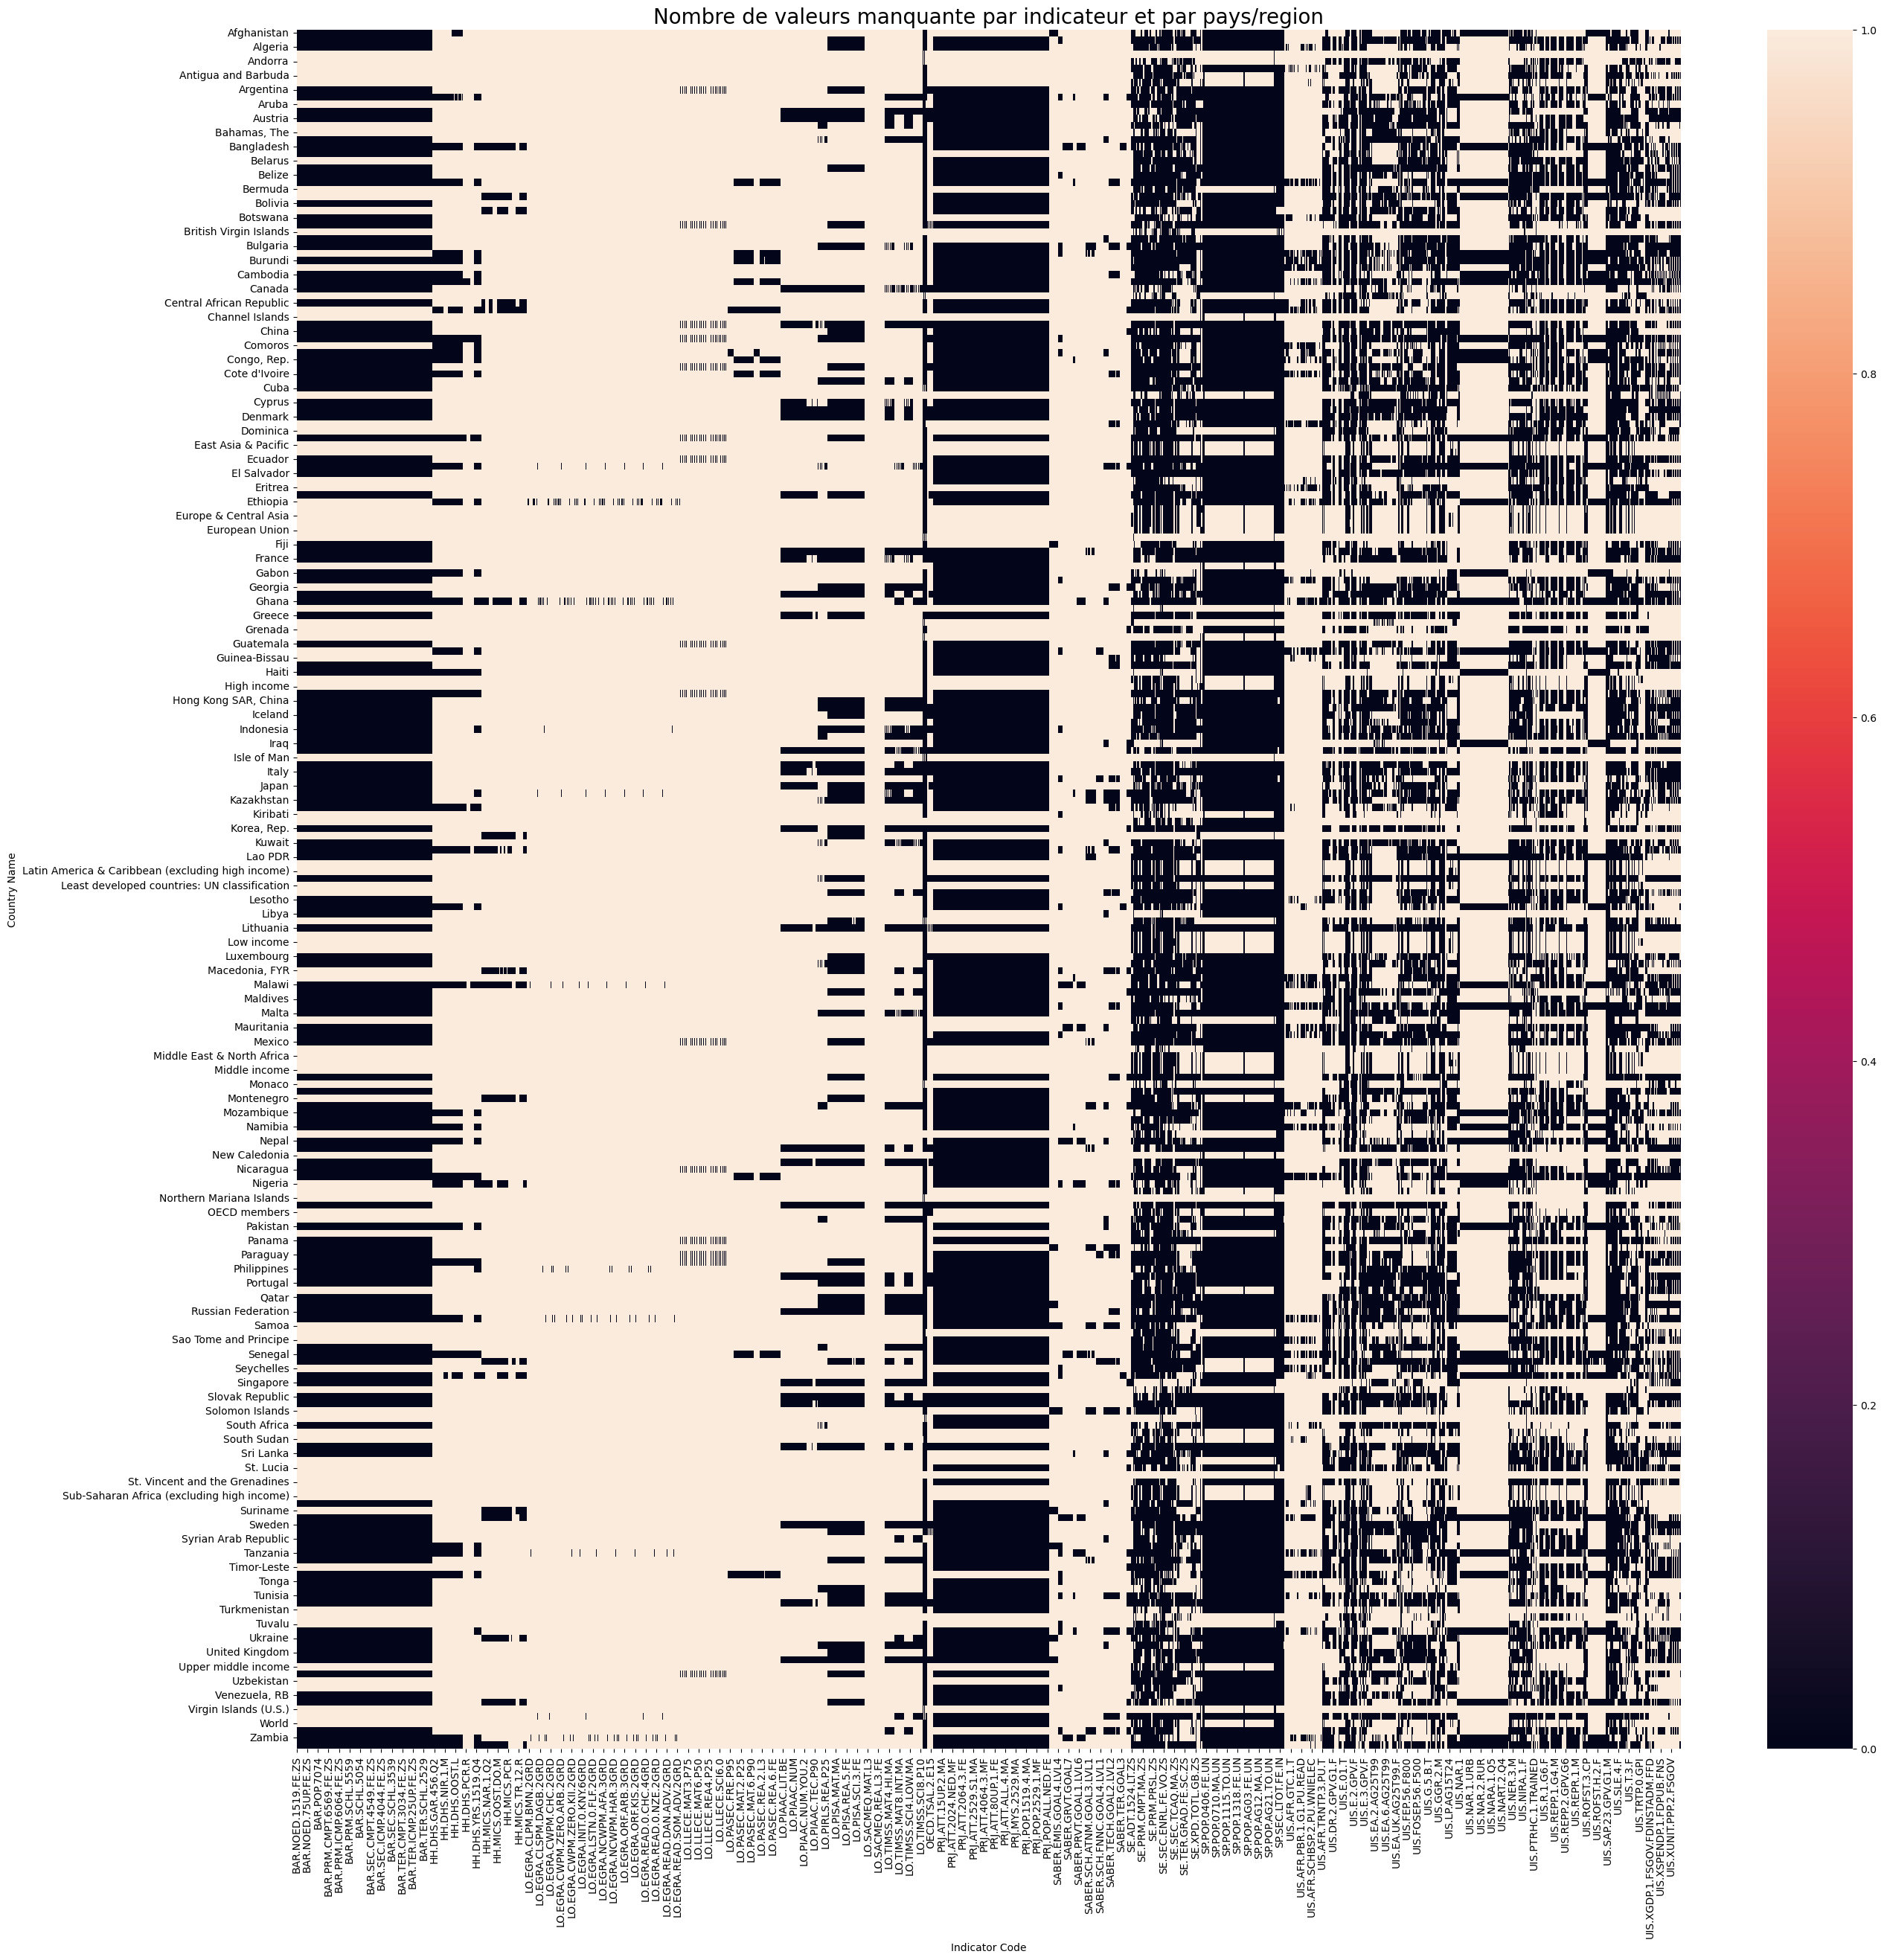

In [49]:
plt.figure(figsize=(30,30))
plt.title("Nombre de valeurs manquante par indicateur et par pays/region", size=20)
sns.heatmap(data=Data_manquante)

En observant l'allure de cette carte, on peut remarquer ceci : 
<br>
- Le choix des indicateurs a plus de répercursion sur le nombre de valeur manquante que le choix du pays ou de la région géographique. <br>
- Certains indicateurs présentent moins de NaN. Il s'agit notamment des indicateurs avec les préfixes suivant : HH, LO, SABER, UIS.AFR, UIS.NAR 

Aurait-on la même tendance si observe ces indicateurs en séparant les pays et les régions ?

In [50]:
# Reprenons notre liste, zones, créer au début ce travail et contenant uniquement les regions geographiques
zones

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (developing only)',
 'East Asia & Pacific (all income levels)',
 'Euro area',
 'European UnionEurope & Centraµl Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (developing only)',
 'Europe & Central Asia (all income levels)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (developing only)',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding h

In [51]:
# Je retire les régions et j'affiche de nouveau la carte
Data_manquante_pays = Data_reduit[~Data_reduit['Country Name'].isin(zones)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')
Data_manquante_pays.head(3)

Indicator Code  BAR.NOED.1519.FE.ZS  BAR.NOED.1519.ZS  BAR.NOED.15UP.FE.ZS  \
Country Name                                                                 
Afghanistan                   False             False                False   
Albania                       False             False                False   
Algeria                       False             False                False   

Indicator Code  BAR.NOED.15UP.ZS  BAR.NOED.2024.FE.ZS  BAR.NOED.2024.ZS  \
Country Name                                                              
Afghanistan                False                False             False   
Albania                    False                False             False   
Algeria                    False                False             False   

Indicator Code  BAR.NOED.2529.FE.ZS  BAR.NOED.2529.ZS  BAR.NOED.25UP.FE.ZS  \
Country Name                                                                 
Afghanistan                   False             False                False   
Albania                       False             False                False   
Algeria                       False             False                False   

Indicator Code  BAR.NOED.25UP.ZS  ...  UIS.XUNIT.US.4.FSGOV  \
Country Name                      ...                         
Afghanistan                False  ...                  True   
Albania                    False  ...                  True   
Algeria                    False  ...                  True   

Indicator Code  UIS.XUNIT.US.56.FSGOV  UIS.XUNIT.USCONST.1.FSGOV  \
Country Name                                                       
Afghanistan                      True                       True   
Albania                         False                      False   
Algeria                          True                       True   

Indicator Code  UIS.XUNIT.USCONST.2.FSGOV  UIS.XUNIT.USCONST.23.FSGOV  \
Country Name                                                            
Afghanistan                          True                        True   
Albania                             False                       False   
Algeria                              True                        True   

Indicator Code  UIS.XUNIT.USCONST.3.FSGOV  UIS.XUNIT.USCONST.4.FSGOV  \
Country Name                                                           
Afghanistan                          True                       True   
Albania                             False                       True   
Algeria                              True                       True   

Indicator Code  UIS.XUNIT.USCONST.56.FSGOV  XGDP.23.FSGOV.FDINSTADM.FFD  \
Country Name                                                              
Afghanistan                           True                         True   
Albania                              False                        False   
Algeria                               True                         True   

Indicator Code  XGDP.56.FSGOV.FDINSTADM.FFD  
Country Name                                 
Afghanistan                            True  
Albania                               False  
Algeria                                True  

[3 rows x 3665 columns]

<AxesSubplot:title={'center':'Nombre de valeurs manquante par indicateur et par pays'}, xlabel='Indicator Code', ylabel='Country Name'>

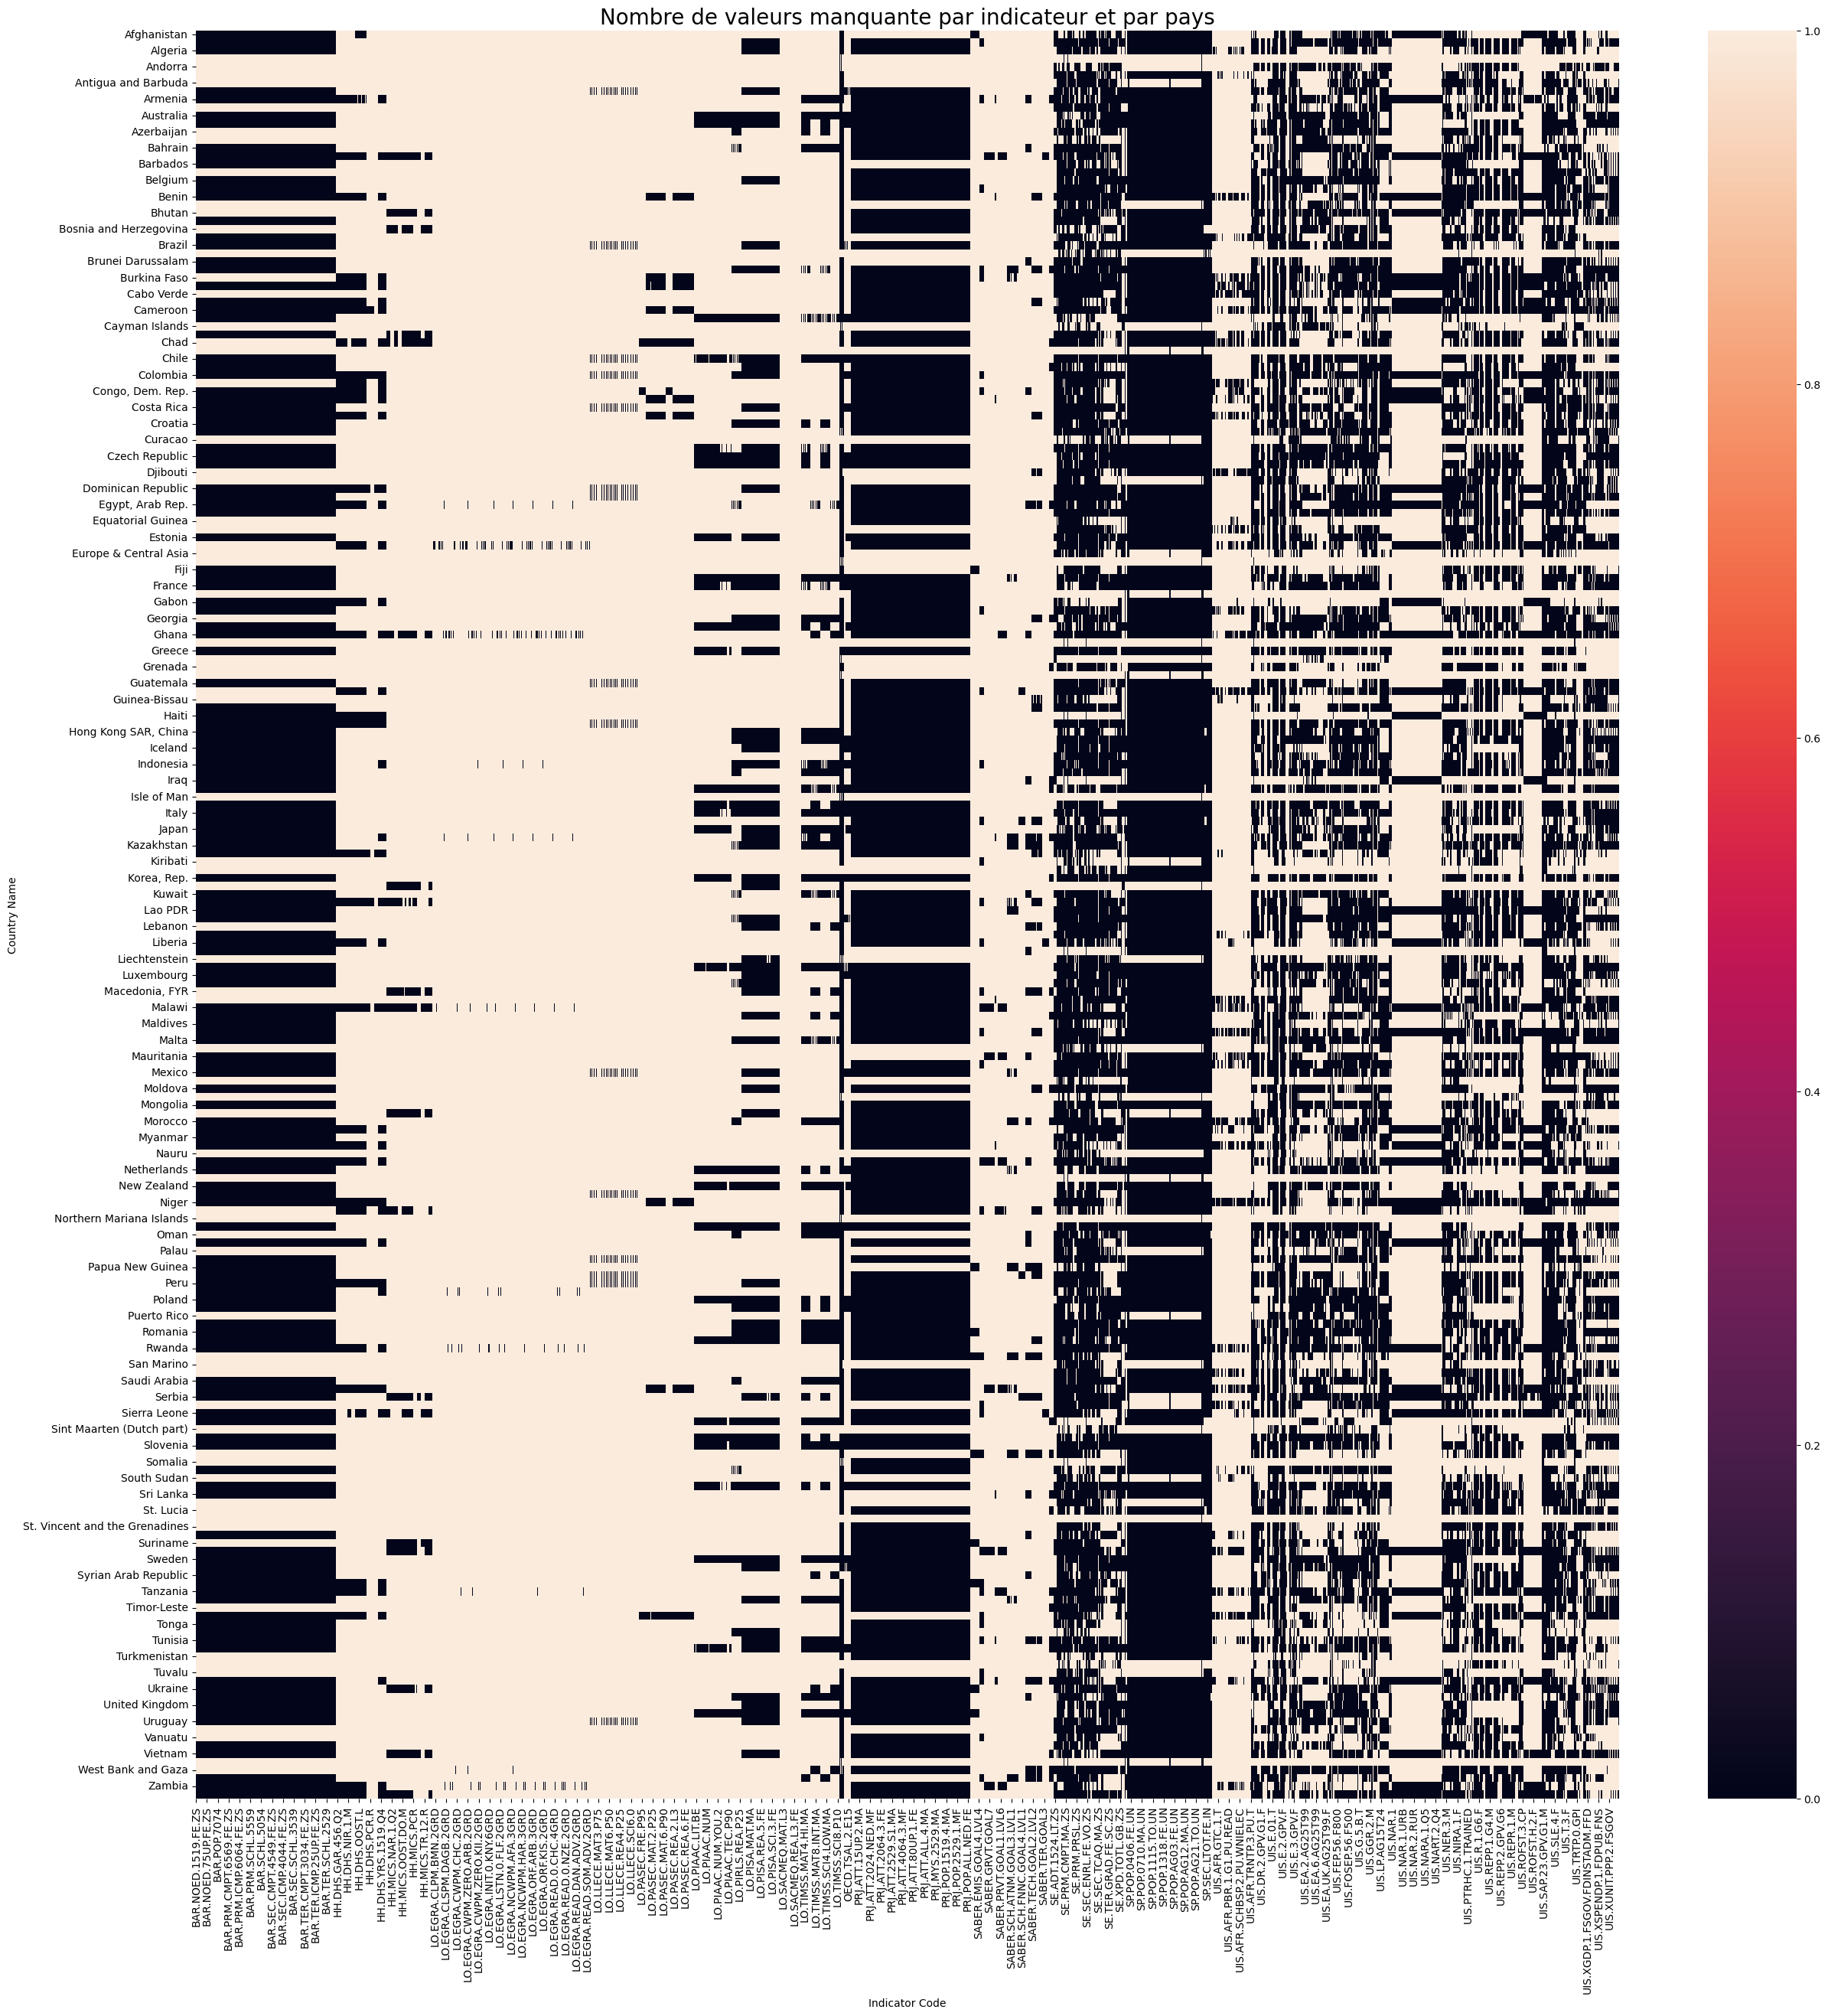

In [52]:
plt.figure(figsize=(30,30))
plt.title("Nombre de valeurs manquante par indicateur et par pays", size=20)
sns.heatmap(data=Data_manquante_pays)

La tendance est la même que précedemment. On ne peut tirer de nouvelle conclusion pour les pays.

In [53]:
# J'affiche de nouveau la carte mais, avec uniquement les régions
Data_manquante_region = Data_reduit[Data_reduit['Country Name'].isin(zones)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')
Data_manquante_region.head(3)

Indicator Code                               BAR.NOED.1519.FE.ZS  \
Country Name                                                       
Arab World                                                  True   
East Asia & Pacific                                         True   
East Asia & Pacific (excluding high income)                 True   

Indicator Code                               BAR.NOED.1519.ZS  \
Country Name                                                    
Arab World                                               True   
East Asia & Pacific                                      True   
East Asia & Pacific (excluding high income)              True   

Indicator Code                               BAR.NOED.15UP.FE.ZS  \
Country Name                                                       
Arab World                                                  True   
East Asia & Pacific                                         True   
East Asia & Pacific (excluding high income)                 True   

Indicator Code                               BAR.NOED.15UP.ZS  \
Country Name                                                    
Arab World                                               True   
East Asia & Pacific                                      True   
East Asia & Pacific (excluding high income)              True   

Indicator Code                               BAR.NOED.2024.FE.ZS  \
Country Name                                                       
Arab World                                                  True   
East Asia & Pacific                                         True   
East Asia & Pacific (excluding high income)                 True   

Indicator Code                               BAR.NOED.2024.ZS  \
Country Name                                                    
Arab World                                               True   
East Asia & Pacific                                      True   
East Asia & Pacific (excluding high income)              True   

Indicator Code                               BAR.NOED.2529.FE.ZS  \
Country Name                                                       
Arab World                                                  True   
East Asia & Pacific                                         True   
East Asia & Pacific (excluding high income)                 True   

Indicator Code                               BAR.NOED.2529.ZS  \
Country Name                                                    
Arab World                                               True   
East Asia & Pacific                                      True   
East Asia & Pacific (excluding high income)              True   

Indicator Code                               BAR.NOED.25UP.FE.ZS  \
Country Name                                                       
Arab World                                                  True   
East Asia & Pacific                                         True   
East Asia & Pacific (excluding high income)                 True   

Indicator Code                               BAR.NOED.25UP.ZS  ...  \
Country Name                                                   ...   
Arab World                                               True  ...   
East Asia & Pacific                                      True  ...   
East Asia & Pacific (excluding high income)              True  ...   

Indicator Code                               UIS.XUNIT.US.4.FSGOV  \
Country Name                                                        
Arab World                                                   True   
East Asia & Pacific                                          True   
East Asia & Pacific (excluding high income)                  True   

Indicator Code                               UIS.XUNIT.US.56.FSGOV  \
Country Name                                                         
Arab World                                                    True   
East Asia & Pacific                                           True   
East Asia & Pa

<AxesSubplot:title={'center':'Nombre de valeurs manquante par indicateur et par region'}, xlabel='Indicator Code', ylabel='Country Name'>

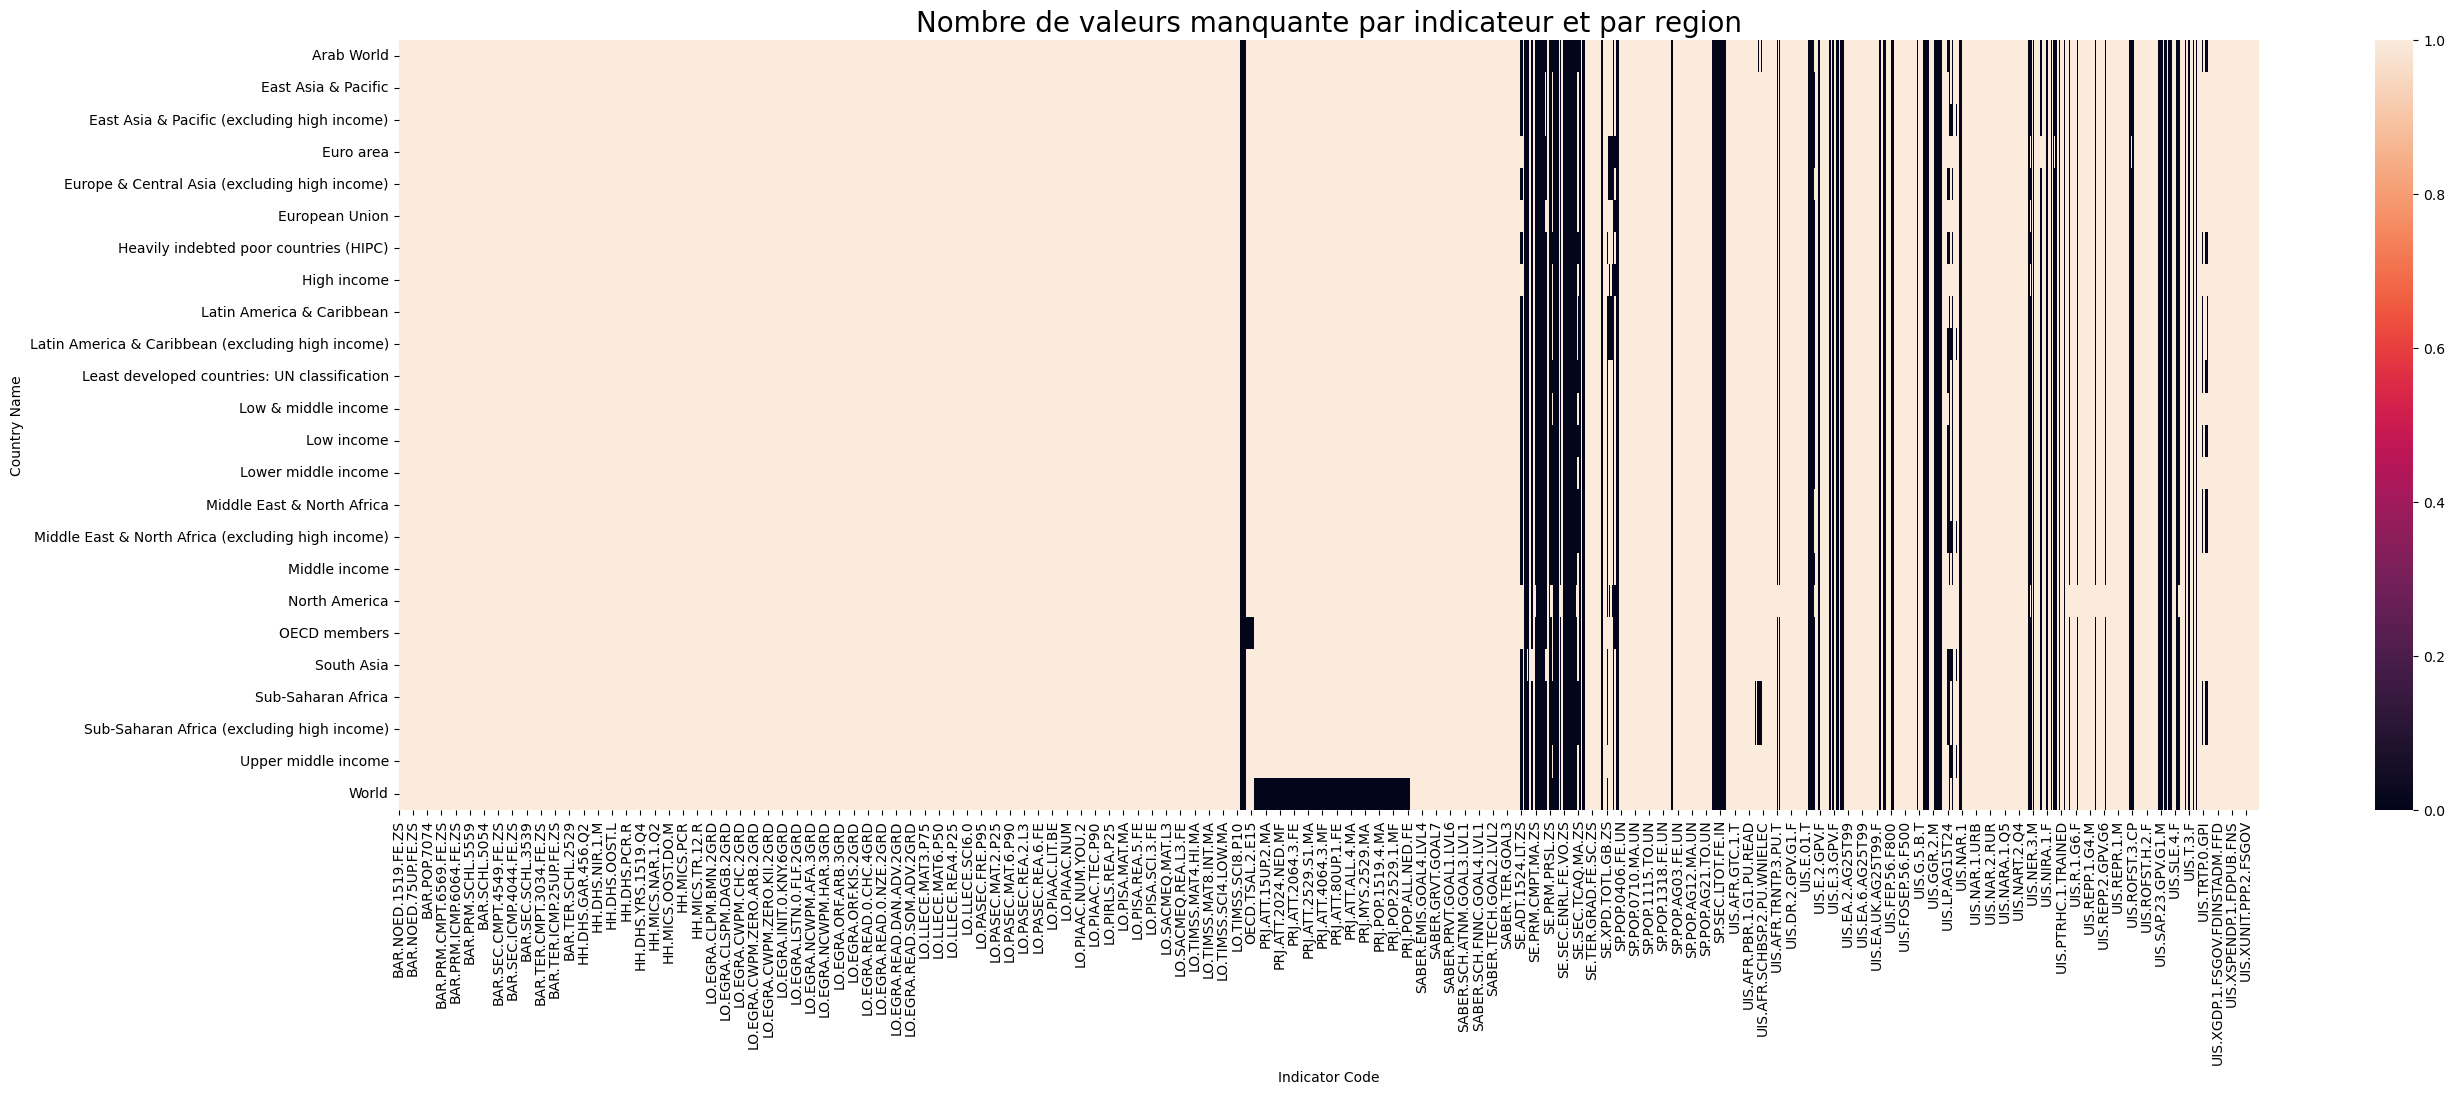

In [54]:
plt.figure(figsize=(30,10))
plt.title("Nombre de valeurs manquante par indicateur et par region", size=20)
sns.heatmap(data=Data_manquante_region)

Cette carte montre des informations pertinentes. En effet, pour de nombreux indicateurs, il n'y a aucune valeurs manquantes pour les groupes de pays! C'est le cas notamment des indicateurs avec ces préfixes
* BAR
* HH
* LO
* PRJ (hors zone World)
* SABER
* SE.TER
* SP.
* UIS

Les indicateurs pertinents ne sont pas identique dans les matrix pays et région.

#### Quels indicateurs retenir ?

Faisons le choix de ne conserver que les indicateurs avec plus de 90% de données signifiantes pour les pays et région.

In [55]:
# Indicateurs à conserver par pays
Data_manquante_pays.drop(Data_manquante_pays.loc[:, Data_manquante_pays.sum()<= Data_manquante_pays.shape[0] * 90/100].columns.tolist(), axis=1, inplace=True)

In [56]:
Indicateurs_pays = Data_manquante_pays.columns.tolist()
Indicateurs_pays

['HH.DHS.PCR',
 'HH.DHS.PCR.F',
 'HH.DHS.PCR.M',
 'HH.DHS.PCR.Q1',
 'HH.DHS.PCR.Q2',
 'HH.DHS.PCR.Q3',
 'HH.DHS.PCR.Q4',
 'HH.DHS.PCR.Q5',
 'HH.DHS.PCR.R',
 'HH.DHS.PCR.U',
 'HH.DHS.SCR',
 'HH.DHS.SCR.F',
 'HH.DHS.SCR.M',
 'HH.DHS.SCR.Q1',
 'HH.DHS.SCR.Q2',
 'HH.DHS.SCR.Q3',
 'HH.DHS.SCR.Q4',
 'HH.DHS.SCR.Q5',
 'HH.DHS.SCR.R',
 'HH.DHS.SCR.U',
 'HH.DHS.TR.12',
 'HH.DHS.TR.12.F',
 'HH.DHS.TR.12.M',
 'HH.DHS.TR.12.Q1',
 'HH.DHS.TR.12.Q2',
 'HH.DHS.TR.12.Q3',
 'HH.DHS.TR.12.Q4',
 'HH.DHS.TR.12.Q5',
 'HH.DHS.TR.12.R',
 'HH.DHS.TR.12.U',
 'HH.MICS.GAR.456',
 'HH.MICS.GAR.456.F',
 'HH.MICS.GAR.456.M',
 'HH.MICS.GAR.456.Q1',
 'HH.MICS.GAR.456.Q2',
 'HH.MICS.GAR.456.Q3',
 'HH.MICS.GAR.456.Q4',
 'HH.MICS.GAR.456.Q5',
 'HH.MICS.GAR.456.R',
 'HH.MICS.GAR.456.U',
 'HH.MICS.NAR.1',
 'HH.MICS.NAR.1.F',
 'HH.MICS.NAR.1.M',
 'HH.MICS.NAR.1.Q1',
 'HH.MICS.NAR.1.Q2',
 'HH.MICS.NAR.1.Q3',
 'HH.MICS.NAR.1.Q4',
 'HH.MICS.NAR.1.Q5',
 'HH.MICS.NAR.1.R',
 'HH.MICS.NAR.1.U',
 'HH.MICS.NAR.23',
 'HH.MICS.NAR.23

In [57]:
#Indicateurs à conserver par région
Data_manquante_region.drop(Data_manquante_region.loc[:, Data_manquante_region.sum()<= Data_manquante_region.shape[0] * 90/100].columns.tolist(), axis=1, inplace=True)

In [58]:
Indicateurs_region = Data_manquante_region.columns.tolist()

In [59]:
#Indicateurs à conserver
Indicateurs_a_conserver = list(dict.fromkeys(Indicateurs_pays + Indicateurs_region))
Indicateurs_a_conserver

['HH.DHS.PCR',
 'HH.DHS.PCR.F',
 'HH.DHS.PCR.M',
 'HH.DHS.PCR.Q1',
 'HH.DHS.PCR.Q2',
 'HH.DHS.PCR.Q3',
 'HH.DHS.PCR.Q4',
 'HH.DHS.PCR.Q5',
 'HH.DHS.PCR.R',
 'HH.DHS.PCR.U',
 'HH.DHS.SCR',
 'HH.DHS.SCR.F',
 'HH.DHS.SCR.M',
 'HH.DHS.SCR.Q1',
 'HH.DHS.SCR.Q2',
 'HH.DHS.SCR.Q3',
 'HH.DHS.SCR.Q4',
 'HH.DHS.SCR.Q5',
 'HH.DHS.SCR.R',
 'HH.DHS.SCR.U',
 'HH.DHS.TR.12',
 'HH.DHS.TR.12.F',
 'HH.DHS.TR.12.M',
 'HH.DHS.TR.12.Q1',
 'HH.DHS.TR.12.Q2',
 'HH.DHS.TR.12.Q3',
 'HH.DHS.TR.12.Q4',
 'HH.DHS.TR.12.Q5',
 'HH.DHS.TR.12.R',
 'HH.DHS.TR.12.U',
 'HH.MICS.GAR.456',
 'HH.MICS.GAR.456.F',
 'HH.MICS.GAR.456.M',
 'HH.MICS.GAR.456.Q1',
 'HH.MICS.GAR.456.Q2',
 'HH.MICS.GAR.456.Q3',
 'HH.MICS.GAR.456.Q4',
 'HH.MICS.GAR.456.Q5',
 'HH.MICS.GAR.456.R',
 'HH.MICS.GAR.456.U',
 'HH.MICS.NAR.1',
 'HH.MICS.NAR.1.F',
 'HH.MICS.NAR.1.M',
 'HH.MICS.NAR.1.Q1',
 'HH.MICS.NAR.1.Q2',
 'HH.MICS.NAR.1.Q3',
 'HH.MICS.NAR.1.Q4',
 'HH.MICS.NAR.1.Q5',
 'HH.MICS.NAR.1.R',
 'HH.MICS.NAR.1.U',
 'HH.MICS.NAR.23',
 'HH.MICS.NAR.23

In [60]:
print("Nombre d'indicateurs à conserver :", len(Indicateurs_a_conserver))

Nombre d'indicateurs à conserver : 3275


In [61]:
print("Proportion conservée vis à vis du dataset initial : ", round(len(Indicateurs_a_conserver) / Data['Indicator Code'].nunique(),2) *100 ,'%')

Proportion conservée vis à vis du dataset initial :  89.0 %


Filtrons le tableau Data en conservant uniquement les indicateurs ci-dessus

In [62]:
Data = Data[Data['Indicator Code'].isin(Indicateurs_a_conserver)]

In [63]:
Data

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
8        Arab World          ARB   
...             ...          ...   
886917     Zimbabwe          ZWE   
886918     Zimbabwe          ZWE   
886919     Zimbabwe          ZWE   
886920     Zimbabwe          ZWE   
886921     Zimbabwe          ZWE   

                                           Indicator Name    Indicator Code  \
0       Adjusted net enrolment rate, lower secondary, ...        UIS.NERA.2   
1       Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2.F   
2       Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.GPI   
3       Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2.M   
8       Adjusted net enrolment rate, upper secondary, ...        UIS.NERA.3   
...                                                   ...               ...   
886917  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.1.MA   
886918  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.1.MF   
886919  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.FE   
886920  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MA   
886921  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   

        1970s  1980s  1990s  2000s     2010s     2020s     2030s     2040s  \
0         NaN    NaN    NaN    NaN       NaN       NaN       NaN       NaN   
1         NaN    NaN    NaN    NaN       NaN       NaN       NaN       NaN   
2         NaN    NaN    NaN    NaN       NaN       NaN       NaN       NaN   
3         NaN    NaN    NaN    NaN       NaN       NaN       NaN       NaN   
8         NaN    NaN    NaN    NaN       NaN       NaN       NaN       NaN   
...       ...    ...    ...    ...       ...       ...       ...       ...   
886917    NaN    NaN    NaN    NaN   760.565   633.205   505.360   377.385   
886918    NaN    NaN    NaN    NaN  1544.635  1307.275  1059.975   812.930   
886919    NaN    NaN    NaN    NaN  1562.390  2209.315  2779.000  3179.035   
886920    NaN    NaN    NaN    NaN  1741.100  2284.025  2734.150  3015.255   
886921    NaN    NaN    NaN    NaN  3303.490  4493.345  5513.155  6194.295   

           2050s    2060s     2070s     2080s     2090s    2100s  
0            NaN      NaN       NaN       NaN       NaN      NaN  
1            NaN      NaN       NaN       NaN       NaN      NaN  
2            NaN      NaN       NaN       NaN       NaN      NaN  
3            NaN      NaN       NaN       NaN       NaN      NaN  
8            NaN      NaN       NaN       NaN       NaN      NaN  
...          ...      ...       ...       ...       ...      ...  
886917   275.405   195.77   138.270    99.260    72.885    59.06  
886918   616.510   457.35   323.095   225.075   158.125   124.17  
886919  3397.600  3481.49  3480.180  3404.075  3283.290  3175.64  
886920  3116.330  3092.81  3021.120  2942.980  2870.335  2813.31  
886921  6513.930  6574.30  6501.305  6347.055  6153.625  5988.95  

[792550 rows x 18 columns]

**Rapel** : notre but est d'identifier les pays avec un fort potentiel d'élèves et étudiants qui ont un accès facilité à internet et un pouvoir d'achat important (en ce qui concerne les études). <br> Quels indicateurs peuvent nous permettre de répondre à cette problématique ?

**Les indicateurs liés aux nombres d'élèves et étudiants** <br>
* UIS.E.4 Enrolment in post-secondary non-tertiary education, both sexes (number)
* UIS.E.3 Enrolment in upper secondary education, both sexes (number)
* SE.TER.ENRL Enrolment in tertiary education, all programmes, both sexes (number

**Indicateurs liés aux données démographique**
* SP.POP.TOTL Population, total
* SP.POP.1524.TO.UN Population, ages 15-24, total

**Indicateurs liés à l'accès à internet**
* IT.NET.USER.P2 Internet users (per 100 people)
* IT.CMP.PCMP.P2 Personal computers (per 100 people)

In [64]:
# Je rassemble ces indicateurs dans une liste
Indicateurs = ['UIS.E.4',
              'UIS.E.3',
              'SE.TER.ENRL',
              'UIS.X.USCONST.3.FSGOV',
              'SP.POP.TOTL',
              'SP.POP.1524.TO.UN',
              'IT.NET.USER.P2',
              'IT.CMP.PCMP.P2']

In [65]:
# J'affiche notre jeu de données avec uniquement les indicateurs sélectionnés
Data_reduit[Data_reduit['Indicator Code'].isin(Indicateurs)][['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010s',ascending=False)

Indicator Name     Indicator Code  2010s
6                                  Population, total        SP.POP.TOTL    240
3                    Internet users (per 100 people)     IT.NET.USER.P2    229
2  Enrolment in upper secondary education, both s...            UIS.E.3    206
1  Enrolment in tertiary education, all programme...        SE.TER.ENRL    197
5                      Population, ages 15-24, total  SP.POP.1524.TO.UN    181
0  Enrolment in post-secondary non-tertiary educa...            UIS.E.4    137
4                Personal computers (per 100 people)     IT.CMP.PCMP.P2      0

L'indicateur IT.CMP.PCMP.P2 ne contient aucune valeur, on procède à sa suppression

In [66]:
Indicateurs.pop()

'IT.CMP.PCMP.P2'

In [67]:
Data_reduit[Data_reduit['Indicator Code'].isin(Indicateurs)][['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010s',ascending=False)

Indicator Name     Indicator Code  2010s
5                                  Population, total        SP.POP.TOTL    240
3                    Internet users (per 100 people)     IT.NET.USER.P2    229
2  Enrolment in upper secondary education, both s...            UIS.E.3    206
1  Enrolment in tertiary education, all programme...        SE.TER.ENRL    197
4                      Population, ages 15-24, total  SP.POP.1524.TO.UN    181
0  Enrolment in post-secondary non-tertiary educa...            UIS.E.4    137

#### Les 6 indicateurs ci-dessus nous serons utiles pour apporter une réponse à notre problématique

### Idendification des pays à fort potentiel

Je mets à jour nos dataframe (Data_country et Data_region) avec uniquement les indicateurs et la décennie sélectionnés

In [68]:
# Par pays
Data_country = Data_reduit[Data_reduit['Country Name'].isin(liste_pays)][Data_reduit['Indicator Code'].isin(Indicateurs)].drop(['NaN'], axis=1)
Data_country.head(6)

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2748303207.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_country = Data_reduit[Data_reduit['Country Name'].isin(liste_pays)][Data_reduit['Indicator Code'].isin(Indicateurs)].drop(['NaN'], axis=1)


Country Name Country Code  \
92796  Afghanistan          AFG   
92829  Afghanistan          AFG   
92839  Afghanistan          AFG   
93000  Afghanistan          AFG   
94107  Afghanistan          AFG   
94158  Afghanistan          AFG   

                                          Indicator Name     Indicator Code  \
92796  Enrolment in post-secondary non-tertiary educa...            UIS.E.4   
92829  Enrolment in tertiary education, all programme...        SE.TER.ENRL   
92839  Enrolment in upper secondary education, both s...            UIS.E.3   
93000                    Internet users (per 100 people)     IT.NET.USER.P2   
94107                      Population, ages 15-24, total  SP.POP.1524.TO.UN   
94158                                  Population, total        SP.POP.TOTL   

              2010s      Region  
92796  9.695980e+04  South Asia  
92829  1.801890e+05  South Asia  
92839  8.260400e+05  South Asia  
93000  6.601467e+00  South Asia  
94107  6.679801e+06  South Asia  
94158  3.172728e+07  South Asia

In [69]:
# Par région
Data_region = Data_reduit[Data_reduit["Country Name"].isin(zones)][Data_reduit["Indicator Code"].isin(Indicateurs)].drop(["NaN"], axis=1)
Data_region.head(6)

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\3479963815.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_region = Data_reduit[Data_reduit["Country Name"].isin(zones)][Data_reduit["Indicator Code"].isin(Indicateurs)].drop(["NaN"], axis=1)


Country Name Country Code  \
1171   Arab World          ARB   
1204   Arab World          ARB   
1214   Arab World          ARB   
1375   Arab World          ARB   
2482   Arab World          ARB   
2533   Arab World          ARB   

                                         Indicator Name     Indicator Code  \
1171  Enrolment in post-secondary non-tertiary educa...            UIS.E.4   
1204  Enrolment in tertiary education, all programme...        SE.TER.ENRL   
1214  Enrolment in upper secondary education, both s...            UIS.E.3   
1375                    Internet users (per 100 people)     IT.NET.USER.P2   
2482                      Population, ages 15-24, total  SP.POP.1524.TO.UN   
2533                                  Population, total        SP.POP.TOTL   

             2010s Region  
1171  2.631211e+05    NaN  
1204  9.222392e+06    NaN  
1214  1.166203e+07    NaN  
1375  3.183446e+01    NaN  
2482           NaN    NaN  
2533  3.587756e+08    NaN

**Déterminons les ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde**

In [70]:
# Grandeurs statistiques pour les zones géographiques
def description_Indicateurs(df, Indicateurs, groupe):
    df_per_indicator = pd.DataFrame()
    for indicateur in Indicateurs:
        df_temp = df[df['Indicator Code'] == indicateur]
        df_temp[indicateur] = df['2010s']
        df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
   
        if df_per_indicator.empty is False:
            df_per_indicator = df_per_indicator.merge(right = df_temp, how = 'outer', on = ['Country Code', 'Country Name', 'Region']).sort_values(by='Country Name')
        else:
            df_per_indicator = df_temp
            
            
    description = df_per_indicator.groupby([groupe])[Indicateurs].describe(percentiles = [0.5])
    for indicateur in Indicateurs:
        description[(indicateur, 'sum')] = description[(indicateur, 'count')] * description[(indicateur, 'mean')]
    colonnes = []
    for indicateur in Indicateurs:
        for stat in ['mean', 'std', '50%', 'sum'] :
            colonnes += [(indicateur, stat)]
    description = description[colonnes]
    description.reset_index(inplace=True)
    return description, df_per_indicator

In [71]:
description_country, df_country = description_Indicateurs(Data_country, Indicateurs, 'Region')
description_region, df_region = description_Indicateurs(Data_region, Indicateurs, 'Country Name')

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2375392298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[indicateur] = df['2010s']
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2375392298.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2375392298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [72]:
description_country

Region        UIS.E.4                                \
                                        mean            std            50%   
0         East Asia & Pacific  179427.537019  279200.588624   27841.000000   
1       Europe & Central Asia   50031.265382  133776.183721   10813.000000   
2   Latin America & Caribbean   53614.363158  180525.720490    3103.000000   
3  Middle East & North Africa    9253.450000   10918.928517    5705.125000   
4               North America  799251.325000            NaN  799251.325000   
5                  South Asia  128660.658333  172484.615145   57321.566667   
6          Sub-Saharan Africa   36579.266667   69361.871705    4679.000000   

                      UIS.E.3                                           \
            sum          mean           std          50%           sum   
0  2.332558e+06  3.104989e+06  9.740027e+06   148159.400  6.520477e+07   
1  1.901188e+06  6.133072e+05  9.304212e+05   263745.900  3.066536e+07   
2  1.018673e+06  6.772967e+05  1.758547e+06   124699.625  2.302809e+07   
3  9.253450e+04  4.005455e+05  5.018389e+05   159624.325  6.408728e+06   
4  7.992513e+05  4.468791e+06  6.342389e+06  1675808.500  1.340637e+07   
5  7.719640e+05  9.415460e+06  1.924265e+07  1262076.500  6.590822e+07   
6  6.950061e+05  4.447514e+05  8.523980e+05   136223.100  1.512155e+07   

    SE.TER.ENRL  ...   SP.POP.TOTL               SP.POP.1524.TO.UN  \
           mean  ...           50%           sum              mean   
0  3.029385e+06  ...  2.027884e+06  2.151557e+09      1.461382e+07   
1  6.263273e+05  ...  5.530253e+06  7.537515e+08      2.203308e+06   
2  7.455761e+05  ...  3.578169e+06  5.863286e+08      3.457839e+06   
3  3.503854e+05  ...  7.142249e+06  2.199133e+08      2.167307e+06   
4  1.013747e+07  ...  3.513338e+07  3.514559e+08      2.484806e+07   
5  4.065026e+06  ...  2.985991e+07  1.698974e+09      4.122661e+07   
6  1.769331e+05  ...  1.156291e+07  8.524755e+08      4.068331e+06   

                                            IT.NET.USER.P2             \
            std           50%           sum           mean        std   
0  4.340982e+07  1.438153e+06  3.361179e+08      39.110122  27.014509   
1  2.918516e+06  1.107469e+06  9.694557e+07      66.374672  21.119148   
2  7.053947e+06  1.337724e+06  1.002773e+08      45.178755  17.067168   
3  2.486249e+06  1.042890e+06  3.901152e+07      51.630411  25.062528   
4  2.884377e+07  2.484806e+07  4.969611e+07      83.859491  10.156386   
5  8.182133e+07  6.607114e+06  3.298129e+08      18.698948  11.954131   
6  6.184988e+06  2.361723e+06  1.668016e+08      13.577007  12.049061   

                           
         50%          sum  
0  34.764191  1134.193534  
1  65.785332  3385.108250  
2  45.003936  1536.077659  
3  56.625398   929.347404  
4  85.361429   251.578473  
5  15.420493   149.591586  
6   9.218154   570.234274  

[7 rows x 29 columns]

In [73]:
description_region.head()

Country Name       UIS.E.4      \
                                                          mean std   
0                                     Arab World  2.631211e+05 NaN   
1                            East Asia & Pacific  2.302949e+06 NaN   
2    East Asia & Pacific (excluding high income)  1.844454e+06 NaN   
3                                      Euro area  1.101148e+06 NaN   
4  Europe & Central Asia (excluding high income)  6.241610e+05 NaN   

                                  UIS.E.3                              \
            50%           sum        mean std         50%         sum   
0  2.631211e+05  2.631211e+05  11662032.4 NaN  11662032.4  11662032.4   
1  2.302949e+06  2.302949e+06  69637812.8 NaN  69637812.8  69637812.8   
2  1.844454e+06  1.844454e+06  62314336.0 NaN  62314336.0  62314336.0   
3  1.101148e+06  1.101148e+06  12966761.2 NaN  12966761.2  12966761.2   
4  6.241610e+05  6.241610e+05  13692785.4 NaN  13692785.4  13692785.4   

  SE.TER.ENRL  ...   SP.POP.TOTL               SP.POP.1524.TO.UN              \
         mean  ...           50%           sum              mean std 50% sum   
0   9222392.0  ...  3.587756e+08  3.587756e+08               NaN NaN NaN NaN   
1  60141309.6  ...  2.250835e+09  2.250835e+09               NaN NaN NaN NaN   
2  50806228.8  ...  2.007695e+09  2.007695e+09               NaN NaN NaN NaN   
3  12889542.4  ...  3.376978e+08  3.376978e+08               NaN NaN NaN NaN   
4  19073678.8  ...  4.102482e+08  4.102482e+08               NaN NaN NaN NaN   

  IT.NET.USER.P2                            
            mean std        50%        sum  
0      31.834459 NaN  31.834459  31.834459  
1      43.754148 NaN  43.754148  43.754148  
2      38.968510 NaN  38.968510  38.968510  
3      75.580997 NaN  75.580997  75.580997  
4      51.297737 NaN  51.297737  51.297737  

[5 rows x 29 columns]

Représentation graphique des indicateurs statistiques par zone géographique

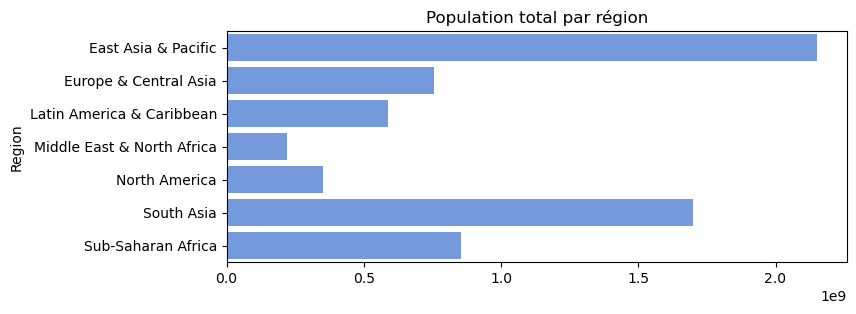

In [74]:
# Population total par région (indicateur SP.POP.TOTL)
plt.figure(figsize = (8,3))
plt.title("Population total par région")
sns.barplot(x = description_country[("SP.POP.TOTL", 'sum')], y=description_country['Region'], color='cornflowerblue')
plt.xlabel("")
plt.show()

Les régions d'Asie sont les plus peuplés.

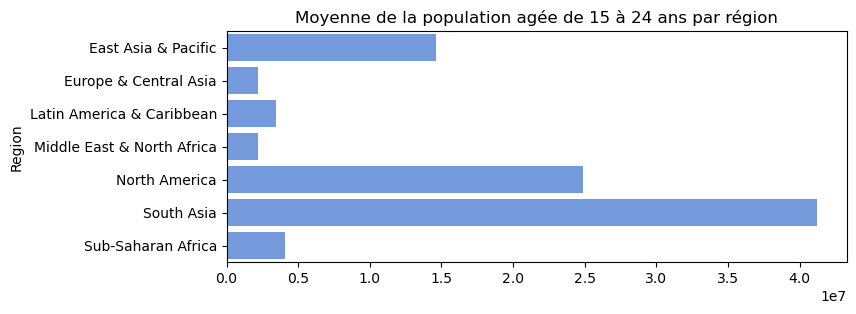

In [75]:
# Population moyenne agée de 15 à 24 ans (indicateur SP.POP.1524.TO.UN)
plt.figure(figsize = (8,3))
plt.title("Moyenne de la population agée de 15 à 24 ans par région")
sns.barplot(x = description_country[("SP.POP.1524.TO.UN", 'mean')], y=description_country['Region'], color='cornflowerblue')
plt.xlabel("")
plt.show()

Les régions d'Asie du sud et de l'Amérique du nord sont celles où l'on retrouve le plus de jeunes âgées de 15 à 24 ans. En troisième place vient l'Asie de l'est et pacifique.

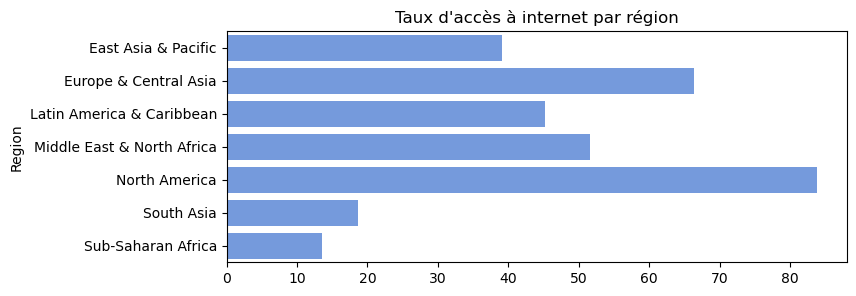

In [76]:
# Accès à internet (indicateur IT.NET.USER.P2)
plt.figure(figsize = (8,3))
plt.title("Taux d'accès à internet par région")
sns.barplot(x = description_country[("IT.NET.USER.P2", 'mean')], y=description_country['Region'], color='cornflowerblue')
plt.xlabel("")
plt.show()

Le taux de pénétration d'internet est inférieur à 20% pour les régions d'Afrique sub-sahérienne et d'Asie du Sud. <br> Seules les régions d'amérique du Nord et d'Europe ont une forte utilisation d'internet, avec un taux de pénétration supérieur à 60%

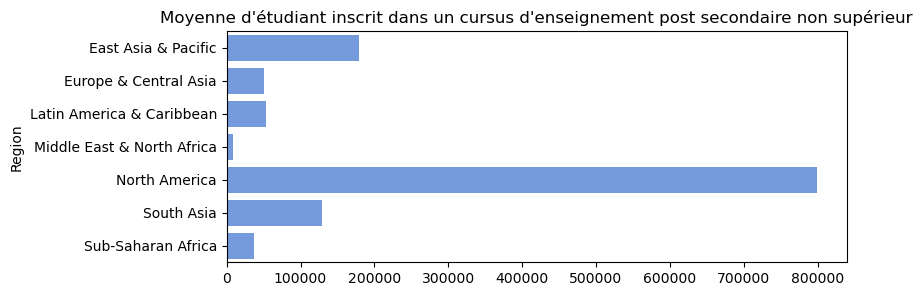

In [77]:
# Nombre d'étudiant inscrit dans un cursus enseignement post-secondaire non supérieur (indicateur UIS.E.4)
plt.figure(figsize = (8,3))
plt.title("Moyenne d'étudiant inscrit dans un cursus d'enseignement post secondaire non supérieur")
sns.barplot(x = description_country[("UIS.E.4", 'mean')], y=description_country['Region'], color='cornflowerblue')
plt.xlabel("")
plt.show()

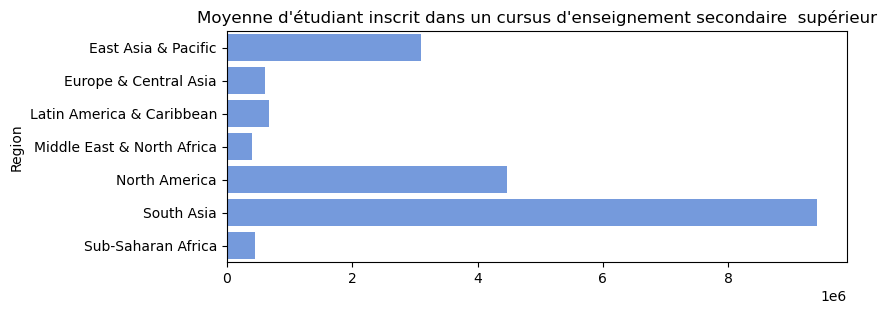

In [78]:
# Nombre d'étudiant inscrit dans un cursus d'enseignement secondaire supérieur (indicateur UIS.E.3)
plt.figure(figsize = (8,3))
plt.title("Moyenne d'étudiant inscrit dans un cursus d'enseignement secondaire  supérieur")
sns.barplot(x = description_country[("UIS.E.3", 'mean')], y=description_country['Region'], color='cornflowerblue')
plt.xlabel("")
plt.show()

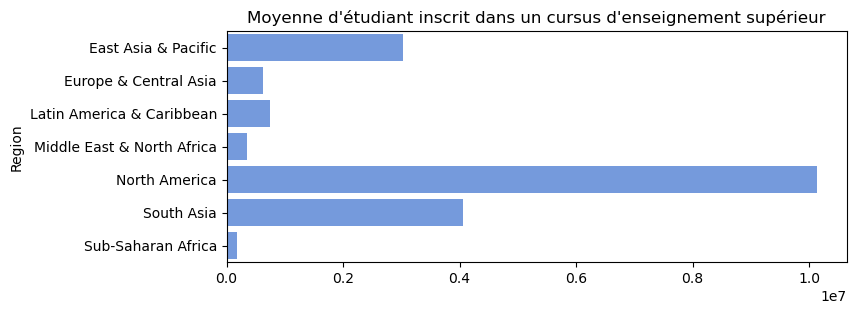

In [79]:
# Nombre d'étudiant inscrit dans un cursus d'enseignement supérieur (indicateur SE.TER.ENRL)
plt.figure(figsize = (8,3))
plt.title("Moyenne d'étudiant inscrit dans un cursus d'enseignement supérieur")
sns.barplot(x = description_country[("SE.TER.ENRL", 'mean')], y=description_country['Region'].sort_values(), color='cornflowerblue')
plt.xlabel("")
plt.show()

La proportion d'édutiants est plus importantes pour les régions d'Amérique du nord, d'Asie du sud et d'Asie de l'est/pacifique. Ce résultat est sans doute lié à leurs forte population jeune, d'âge compris entre 15 et 24 ans. 

**Analyse des barplot** <br> 
Le nombre d'étudiant dans le supérieur est imporatnt en Asie de l'Est & Pacifique, Amérique du Nord et Asie du Sud <br> Le taux de pénétration d'internet est : 
* Fortement élevé en Amérique du Nord, Europe & asie centrale; 
* Ce taux est moyennement élevé en Asie de l'Est & pacifique, en Afirque du Nord & Est et en Amérique latine;
<br>
<br>L'Amérique, l'Asie du Sud, l'Asie de l'Est & pacifique sont des régions qui semblent être les régions où nous pourrions avoir le plus de clients.
<br>

Pour confirmer cette observation, procédons aux analyses :

* Du nombre de lycéens et étudiants par pays :
* Du nombre d'édudiants ayant accès à internet par pays
* Le taux d'évolution d'accès à internet

Quel est le nombre d'édutiants et lycéens par pays ?

In [80]:
# Je crée une nouvelle colonne contenant tous les apprenants (étudiants et lycéens)
df_country["apprenants"] = df_country["UIS.E.4"] + df_country["SE.TER.ENRL"] + df_country["UIS.E.3"]
df_country[["Country Name", "apprenants"]].head()

Country Name    apprenants
0     Afghanistan  1.103189e+06
1         Albania  3.059922e+05
2         Algeria           NaN
3  American Samoa           NaN
4         Andorra  2.192000e+03

In [81]:
# J'affiche les 20 pays ayant le plus d'apprenants
print("liste des pays avec le plus de lycéens et étudiants")
df_country.sort_values(by="apprenants", ascending=False)[["Country Name", "apprenants"]].head(20)

liste des pays avec le plus de lycéens et étudiants


Country Name    apprenants
78            India  8.103193e+07
38            China  8.083619e+07
189   United States  3.280134e+07
25           Brazil  1.774776e+07
86            Japan  7.552915e+06
14       Bangladesh  7.498949e+06
62          Germany  6.343626e+06
133        Pakistan  6.309889e+06
188  United Kingdom  5.770901e+06
139     Philippines  5.597267e+06
58           France  4.954075e+06
84            Italy  4.734863e+06
159    South Africa  4.045657e+06
140          Poland  3.574349e+06
39         Colombia  3.402088e+06
186         Ukraine  3.308591e+06
10        Australia  2.677543e+06
106        Malaysia  2.307053e+06
144         Romania  1.686599e+06
118         Morocco  1.641312e+06

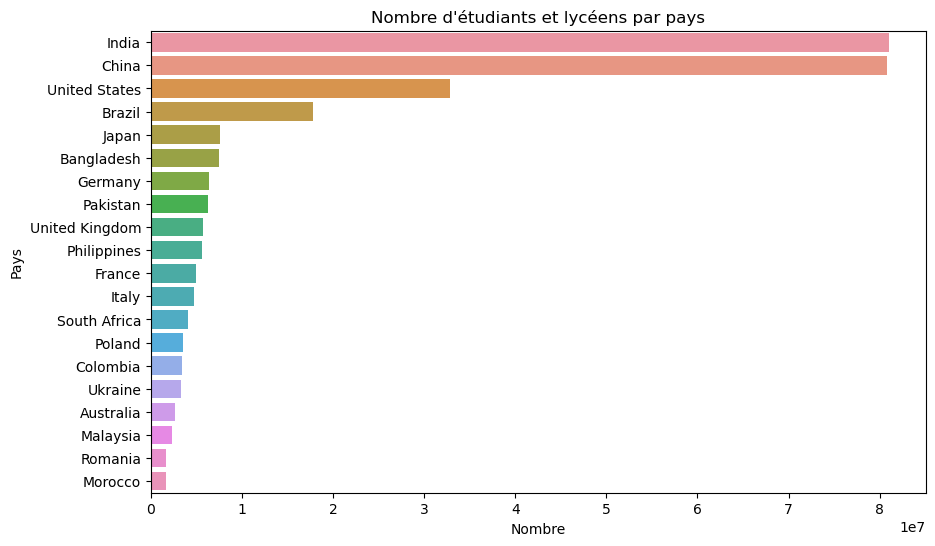

In [82]:
# Voyons ce quels informations on peut en tirer en représentant sous forme de figure
plt.figure(figsize=(10,6))
plt.title("Nombre d'étudiants et lycéens par pays")
sns.barplot(x = df_country.sort_values(by="apprenants", ascending=False)["apprenants"].head(20), y=df_country.sort_values(by="apprenants", ascending=False)['Country Name'].head(20))
plt.xlabel("Nombre")
plt.ylabel("Pays")
plt.show()

Pour avoir le nombre d'édutiants capable de devenir client de notre groupe, on va procéder à la multiplication du nombre d'édutiants par le taux de pénétration d'internet par pays.

In [83]:
df_country["potentiels_clients"] = df_country["apprenants"]*df_country["IT.NET.USER.P2"]/100
print("liste de clients potentiels par pays")
df_country.sort_values(by="potentiels_clients", ascending=False)[["Country Name", "IT.NET.USER.P2", "potentiels_clients"]].head(20)

liste de clients potentiels par pays


Country Name  IT.NET.USER.P2  potentiels_clients
38            China       44.585731        3.604141e+07
189   United States       73.035771        2.395671e+07
78            India       17.399603        1.409923e+07
25           Brazil       51.214529        9.089430e+06
86            Japan       85.306401        6.443120e+06
62          Germany       84.745271        5.375923e+06
188  United Kingdom       89.441457        5.161578e+06
58           France       81.789500        4.051913e+06
84            Italy       56.780535        2.688480e+06
139     Philippines       42.447732        2.375913e+06
140          Poland       65.332414        2.335209e+06
10        Australia       82.105767        2.198417e+06
159    South Africa       42.912731        1.736102e+06
39         Colombia       49.163197        1.672575e+06
106        Malaysia       64.810759        1.495218e+06
124     Netherlands       91.822593        1.387595e+06
186         Ukraine       39.404974        1.303750e+06
17          Belgium       82.295655        9.418769e+05
118         Morocco       54.524967        8.949247e+05
88       Kazakhstan       59.173667        8.759523e+05

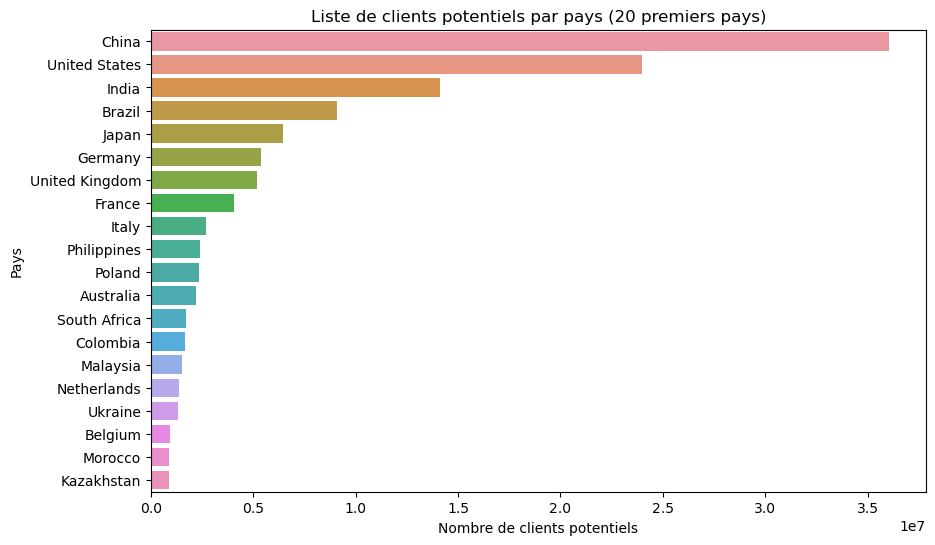

In [84]:
# Graphiquement on obtient ce qui suit :

plt.figure(figsize=(10,6))
plt.title("Liste de clients potentiels par pays (20 premiers pays)")
sns.barplot(x = df_country.sort_values(by="potentiels_clients", ascending=False)["potentiels_clients"].head(20), y=df_country.sort_values(by="potentiels_clients", ascending=False)['Country Name'].head(20))
plt.xlabel("Nombre de clients potentiels")
plt.ylabel("Pays")
plt.show()

La figure ci-dessus nous montre les 20 premiers pays du monde où nous pourrions avoir le plus de clients de notre école. <br>
Cependant, je fais le choix de sélectionner les pays avec un potentiel de plus de un millions de clients

In [85]:
# Quels sont les pays avec plus de 1 million de clients potentiels
Selection_pays = df_country[df_country["potentiels_clients"] > 1000000].sort_values(by="potentiels_clients", ascending=False)["Country Name"].tolist()
print("Voici, par ordre décroissant, la liste des pays avec le plus de potentiels de clients  :" , Selection_pays)

Voici, par ordre décroissant, la liste des pays avec le plus de potentiels de clients  : ['China', 'United States', 'India', 'Brazil', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Philippines', 'Poland', 'Australia', 'South Africa', 'Colombia', 'Malaysia', 'Netherlands', 'Ukraine']


#### Maintenant que nous avons la liste des pays offrant le plus de potentiels de clients, essayons de nous projecter dans l'avenir en analysant l'évolution de ce potentiel de clients

Mettons à jour notre dataframe

In [86]:
# Avant le débuter l'exploration des données, nous avons crée une copie de la table Data (Data_copy). Nous allons utiliser cette copie pour mettre à jour notre dataframe
Data_omega = Data_copy[Data_copy['Country Name'].isin(Selection_pays) & Data_copy['Indicator Code'].isin(['UIS.E.3', 'UIS.E.4', 'SE.TER.ENRL', 'IT.NET.USER.P2'])]
Data_omega.head()

Country Name Country Code  \
129446    Australia          AUS   
129479    Australia          AUS   
129489    Australia          AUS   
129650    Australia          AUS   
188086       Brazil          BRA   

                                           Indicator Name  Indicator Code  \
129446  Enrolment in post-secondary non-tertiary educa...         UIS.E.4   
129479  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
129489  Enrolment in upper secondary education, both s...         UIS.E.3   
129650                    Internet users (per 100 people)  IT.NET.USER.P2   
188086  Enrolment in post-secondary non-tertiary educa...         UIS.E.4   

            1970      1971      1972      1973      1974      1975  ...  2060  \
129446       NaN       NaN       NaN       NaN       NaN       NaN  ...   NaN   
129479  179664.0  193532.0  208149.0  223855.0  252972.0  274738.0  ...   NaN   
129489       NaN       NaN       NaN       NaN       NaN       NaN  ...   NaN   
129650       NaN       NaN       NaN       NaN       NaN       NaN  ...   NaN   
188086       NaN       NaN       NaN       NaN       NaN       NaN  ...   NaN   

        2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
129446   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
129479   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
129489   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
129650   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
188086   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

Nous souhaitons évaluer l'évolution du taux de pénétration d'internet au fil des ans. <br> Pour cela, nous devons remodeler notre dataframe de manière à ce que les années se retrouvent dans une colonnes (et nons plus sur la ligne d'entête)

In [87]:
# J'utilise la fonction melt pour remodeler le dataframe
Data_final = Data_omega.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                  value_vars = ['1970', '1980', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
                                                '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
                                                '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                                '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
                                                '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
                                                '2095', '2100'], var_name = 'Year', value_name = 'Value')
Data_final.head()

Country Name Country Code  \
0    Australia          AUS   
1    Australia          AUS   
2    Australia          AUS   
3    Australia          AUS   
4       Brazil          BRA   

                                      Indicator Name  Indicator Code  Year  \
0  Enrolment in post-secondary non-tertiary educa...         UIS.E.4  1970   
1  Enrolment in tertiary education, all programme...     SE.TER.ENRL  1970   
2  Enrolment in upper secondary education, both s...         UIS.E.3  1970   
3                    Internet users (per 100 people)  IT.NET.USER.P2  1970   
4  Enrolment in post-secondary non-tertiary educa...         UIS.E.4  1970   

      Value  
0       NaN  
1  179664.0  
2       NaN  
3       NaN  
4       NaN

In [88]:
Data_final.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Year               object
Value             float64
dtype: object

In [89]:
# Year est en string, changeons le en entier (int)
Data_final["Year"] = Data_final["Year"].astype(int)
Data_final.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Year                int32
Value             float64
dtype: object

Traçons la courbe d'évolution du taux de pénétration d'internet par pays

In [90]:
Data_final = Data_final[Data_final["Year"] >2000]

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\135362890.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(Data_final[Data_final['Indicator Code'] == 'IT.NET.USER.P2'][Data_final['Country Name'] == country ]['Year'],
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\135362890.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final['Indicator Code'] == 'IT.NET.USER.P2'][Data_final['Country Name'] == country ]['Value'])
C:\Users\alain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\135362890.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.line

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\135362890.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final['Indicator Code'] == 'IT.NET.USER.P2'][Data_final['Country Name'] == country ]['Value'])
C:\Users\alain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\135362890.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(Data_final[Data_final['Indicator Code'] == 'IT.NET.USER.P2'][Data_final['Country Name'] == country ]['Year'],
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\135362890.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_fin

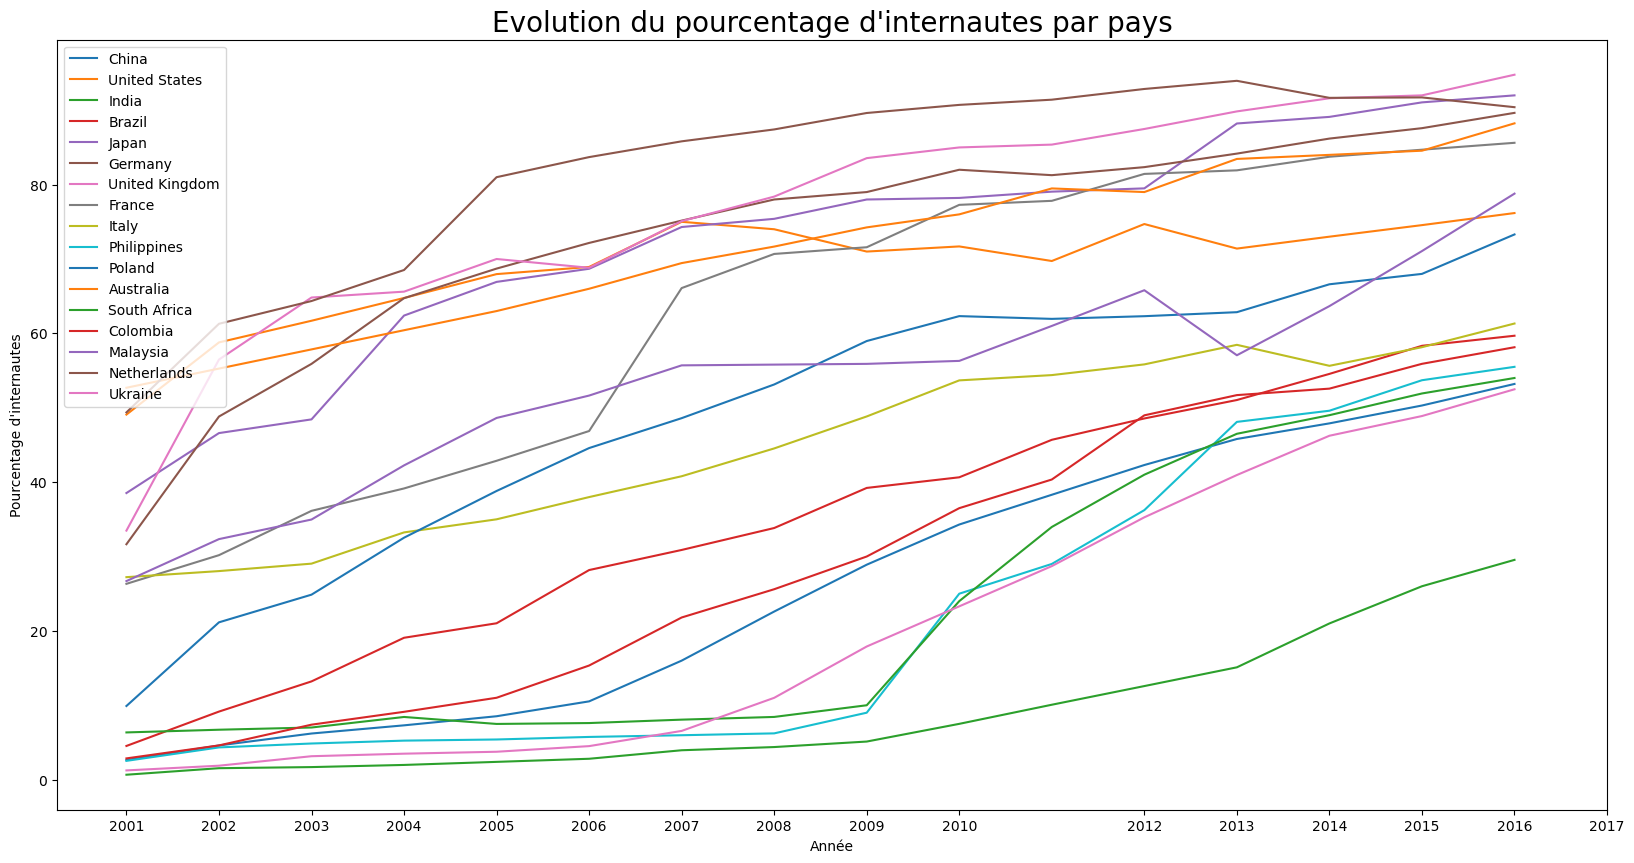

In [91]:
# L'indicateur relatif à l'utilisation d'internet par individus est IT.NET.USER.P2
plt.figure(figsize = (20,10))
for country in Selection_pays:
    sns.lineplot(Data_final[Data_final['Indicator Code'] == 'IT.NET.USER.P2'][Data_final['Country Name'] == country ]['Year'],
            Data_final[Data_final['Indicator Code'] == 'IT.NET.USER.P2'][Data_final['Country Name'] == country ]['Value'])
plt.legend(Selection_pays, loc = 'upper left', )
plt.title("Evolution du pourcentage d'internautes par pays", size=20)
plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2014, 2015, 2016, 2017])
plt.xlabel("Année")
plt.ylabel("Pourcentage d'internautes")
sns.set_palette("dark")
plt.show()

Le graphe ne donne pas de projections après 2016 par contre il montre un taux de pénétration à la hausse de manière linéaire année après année. <br>
On peut donc estimer que les pays de notre liste ayant le moins accès à internet aujourd'hui verront leur part augmenter au fil des années jusqu'à atteindre les 80 % voir plus.

##### Quelle est la tendance du nombre d'étudiant par pays ?

Pour évaluer l'évolution du nombre d'étudiant par pays, nous pouvons commencer par rassembler tous les indicateurs relatifs au nombre d'apprenants (édutiants et lycéens) en un unique indicateurs nommé nombre étudiants

In [92]:
#évolution du nombre d'étudiants
for country in Selection_pays:
    for year in Data_final["Year"].unique().tolist():
        Data_final = Data_final.append({"Country Name" : country,
                         "Country Code" : " ",
                         "Indicator Name" : '',
                         "Indicator Code" : "nombre etudiants",
                         "Region" : " ",
                         "Year" : int(year),
                         "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] + 
        Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] + 
        Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
                                     }
                                     , ignore_index = True)

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is de

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "UIS.E.3"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "UIS.E.4"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] +
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "SE.TER.ENRL"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\2140174967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" 

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\1918266049.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ]["Year"], Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ]["Value"])


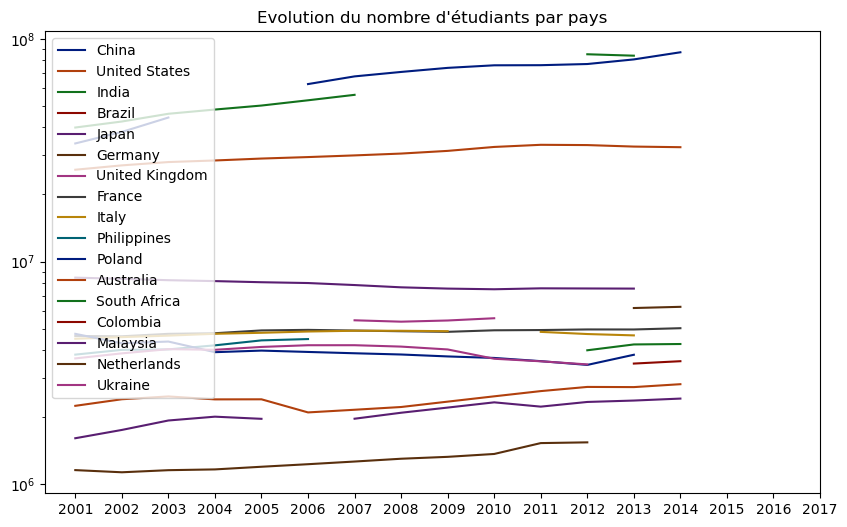

In [93]:
plt.figure(figsize = (10,6))
ax = plt.gca()
ax.set_yscale("log")
for country in Selection_pays:
    plt.plot(Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ]["Year"], Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ]["Value"])
plt.legend(Selection_pays, loc = 'upper left', )
plt.title("Evolution du nombre d'étudiants par pays")
plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
sns.set_palette("dark")
plt.show()

Le graphe ne donne pas de projections après 2014. Cependant, depuis 2001 le nombre d'étudiant ne cèsse de croitre en Chine, en Inde, nouvelle Zélande et Australie. Pour les autres pays, le nombre d'étudiants est quasi stable. <br> Nous pouvons en déduire que les pays où les projections d'augmentation de la population sont importantes verront le nombre d'étudiants augmenter et par conséquent le nombre de clients potentiels.

##### Quelle serait le potentiel d'évolution de la clientèle dans ces pays ?

Pour répondre à cette question, nous devons analyser la combinaison de l'évolution nombre d'étudiant et du taux de pénétration d'internet

In [94]:
# Soit l'indicateur etudiant_internet, qui est le produit des indicateurs relatifs au nombre d'apprenants (nombre etudiants) et de l'inticateur relatif à l'usage d'internet.
#Nous pouvons définir la fonction suivante :
for country in Selection_pays:
    for year in Data_final["Year"].unique().tolist():
        Data_final = Data_final.append({"Country Name" : country,
                         "Country Code" : " ",
                         "Indicator Name" : " ",
                         "Indicator Code" : "etudiant_internet",
                         "Region" : " ",
                         "Year" : int(year),
                         "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] * 
        Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
                                     }
                                     , ignore_index = True)

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "IT.NET.USER.P2"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0]/100
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_final = Data_final.append({"Country Name" : country,
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Value" :  Data_final[Data_final["Indicator Code"] == "nombre etudiants"][Data_final["Country Name"] == country ][Data_final["Year"] == int(year)]["Value"].iloc[0] *
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\749015086.py:12: UserWarning: Boolean Series key will be reindexed to match Data

C:\Users\alain\AppData\Local\Temp\ipykernel_92520\1162495597.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(Data_final[Data_final["Indicator Code"] == "etudiant_internet"][Data_final["Country Name"] == country ]["Year"],
C:\Users\alain\AppData\Local\Temp\ipykernel_92520\1162495597.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_final[Data_final["Indicator Code"] == "etudiant_internet"][Data_final["Country Name"] == country ]["Value"])


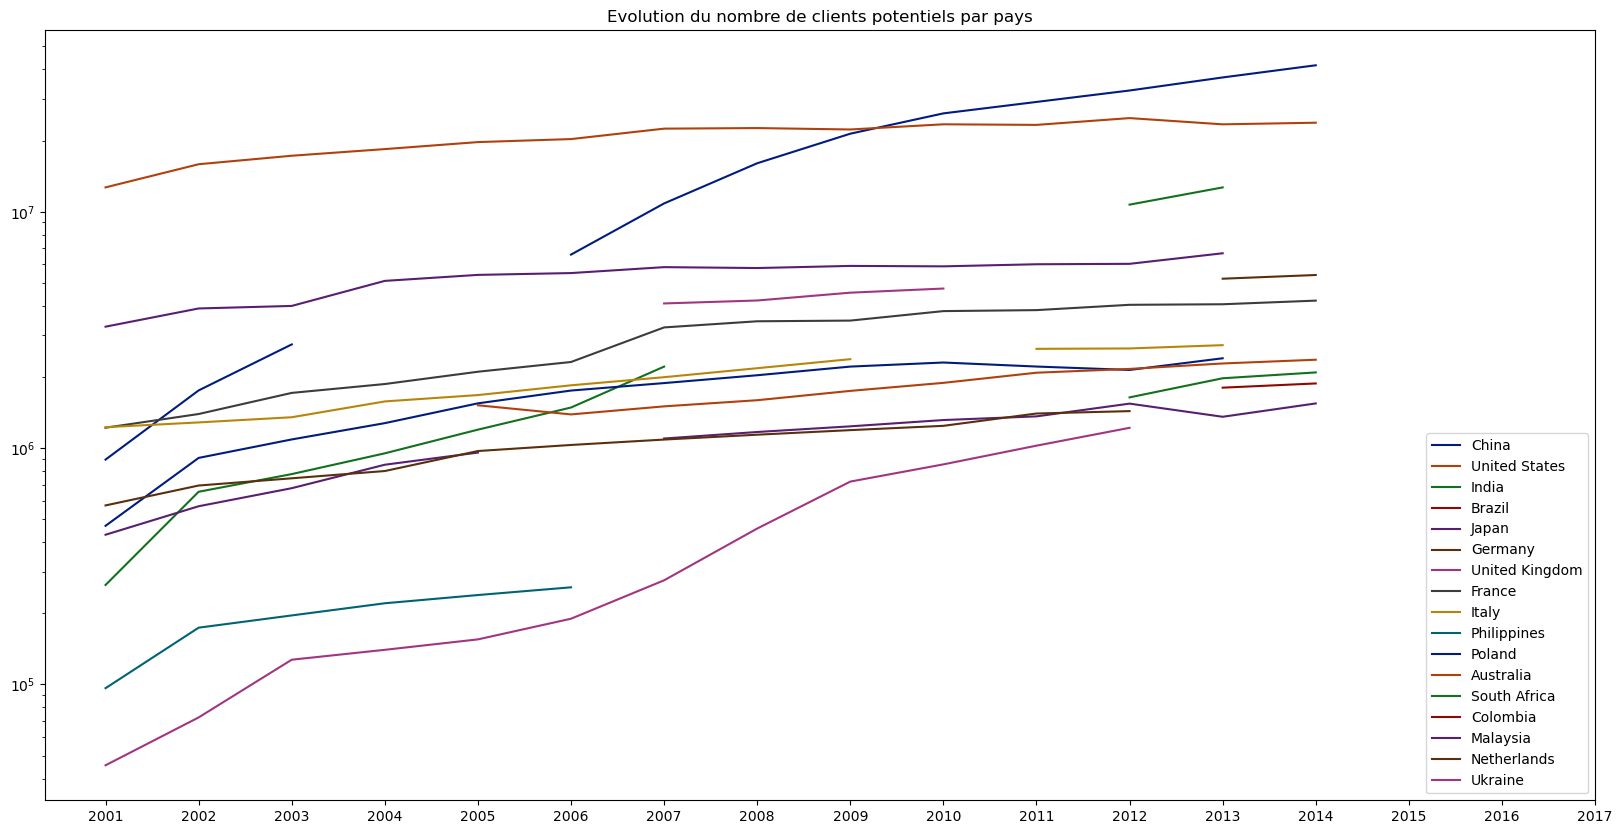

In [95]:
# Evolution de la clientèle par pays
plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_yscale("log")
for country in Selection_pays:
    plt.plot(Data_final[Data_final["Indicator Code"] == "etudiant_internet"][Data_final["Country Name"] == country ]["Year"],
            Data_final[Data_final["Indicator Code"] == "etudiant_internet"][Data_final["Country Name"] == country ]["Value"])
plt.legend(Selection_pays, loc= "lower right")
plt.title("Evolution du nombre de clients potentiels par pays")
plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
sns.set_palette("dark")
plt.show()

Le graphe ne donne pas de projections après 2014. On peut donc pas se projecter dans l'avenir <br>
Néanmoins, on peut remarquer qu'àprès 2011, seuls les courbes de la Chine, de l'Inde et du Japon continuent de croitre.
Nous pouvons en déduire que les pays où les projections d'augmentation sont importantes verront le nombre de clients potentiels augmenter.

#### L'utilisation d'internet étant un facteur déterminant pour notre école, on peut se demander quel potentiel de clientèle offre ces pays pour une adoption d'internet à 80% ?

In [96]:
Data_final

Country Name Country Code  \
0       Australia          AUS   
1       Australia          AUS   
2       Australia          AUS   
3       Australia          AUS   
4          Brazil          BRA   
...           ...          ...   
3463      Ukraine                
3464      Ukraine                
3465      Ukraine                
3466      Ukraine                
3467      Ukraine                

                                         Indicator Name     Indicator Code  \
0     Enrolment in post-secondary non-tertiary educa...            UIS.E.4   
1     Enrolment in tertiary education, all programme...        SE.TER.ENRL   
2     Enrolment in upper secondary education, both s...            UIS.E.3   
3                       Internet users (per 100 people)     IT.NET.USER.P2   
4     Enrolment in post-secondary non-tertiary educa...            UIS.E.4   
...                                                 ...                ...   
3463                                                     etudiant_internet   
3464                                                     etudiant_internet   
3465                                                     etudiant_internet   
3466                                                     etudiant_internet   
3467                                                     etudiant_internet   

      Year         Value Region  
0     2001  1.711580e+05    NaN  
1     2001  8.686890e+05    NaN  
2     2001  1.211219e+06    NaN  
3     2001  5.268927e+01    NaN  
4     2001           NaN    NaN  
...    ...           ...    ...  
3463  2080           NaN         
3464  2085           NaN         
3465  2090           NaN         
3466  2095           NaN         
3467  2100           NaN         

[3468 rows x 7 columns]

In [97]:
potentiel = pd.DataFrame(columns = ['Country', 'Ecart à saturation internet', 'Potentiel clients'])
for country in Data_final[Data_final['Indicator Code'] == 'IT.NET.USER.P2'].sort_values(by='Value')['Country Name'].unique():
    implantation_internet = round(Data_final[(Data_final['Indicator Code'] == 'IT.NET.USER.P2') & (Data_final['Country Name'] == country) & (Data_final['Year'] == 2013)]['Value'].unique()[0], 2)
    if implantation_internet > 80 :
        implantation_internet = 80
    potentiel = pd.concat([potentiel, 
                          pd.DataFrame(
                              {'Country' : [country] ,
                               'Ecart à saturation internet' : [80 - implantation_internet],
                               'Potentiel clients' : [round((80 - implantation_internet) * Data_final[(Data_final['Indicator Code'] == 'etudiant_internet') & (Data_final['Country Name'] == country ) & (Data_final['Year'] == 2013)]['Value'].unique()[0]/100, 0)]
                                      }
                          )]
             )

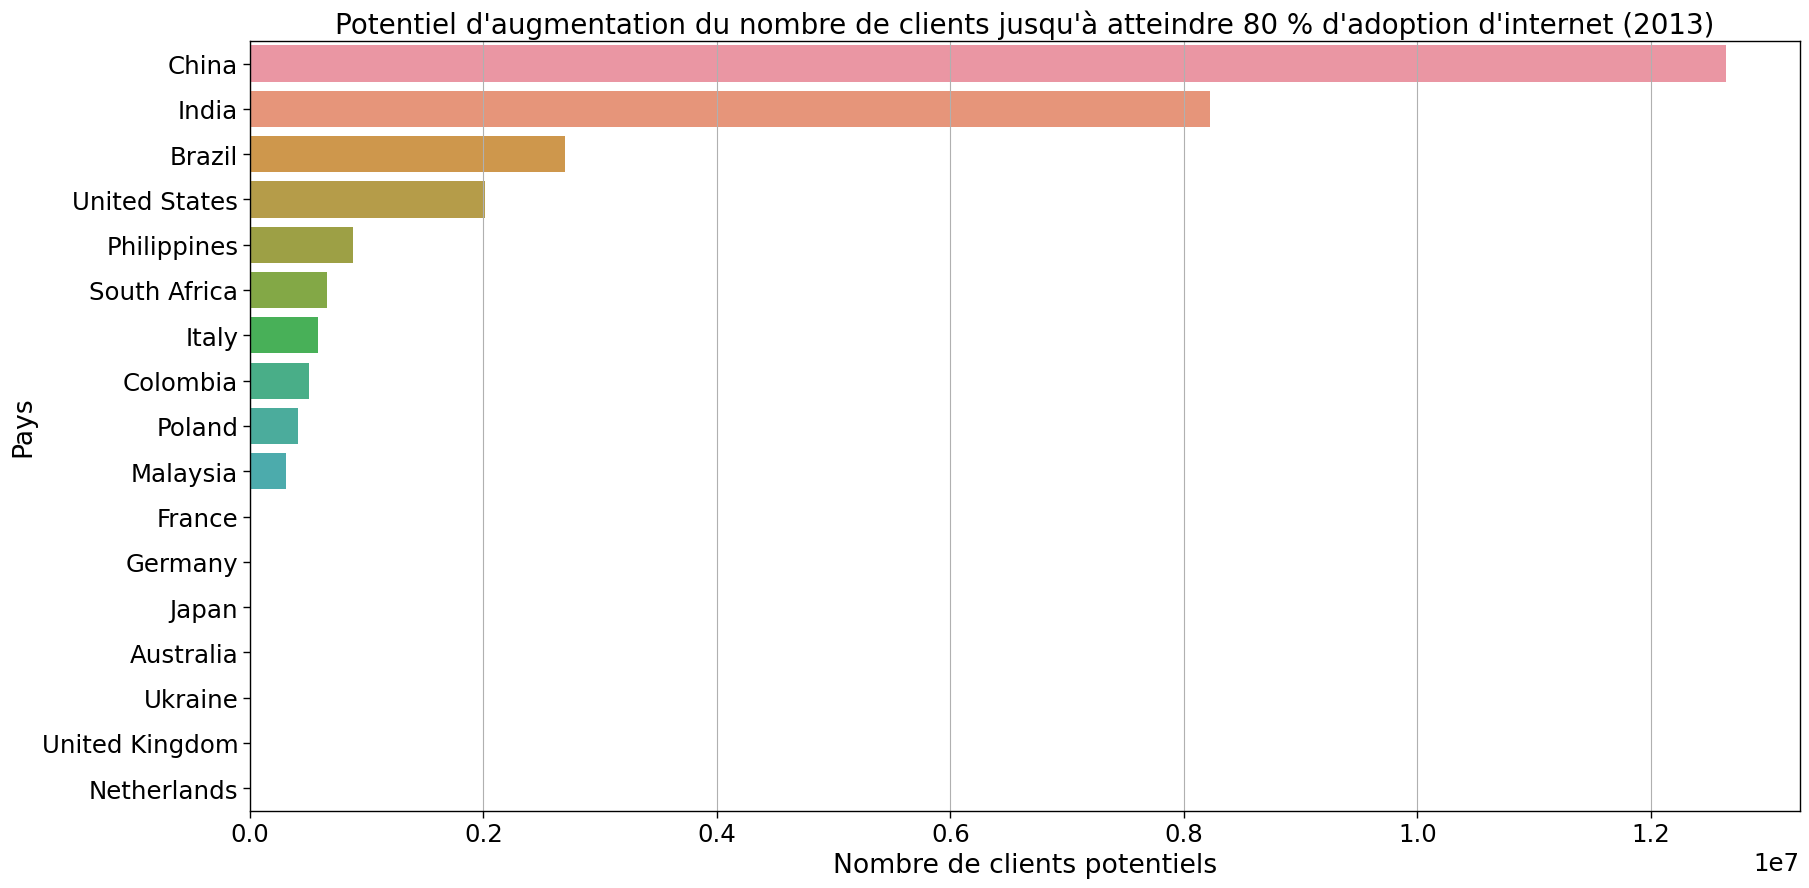

In [98]:
plt.figure(figsize = (20,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = potentiel.sort_values(by="Potentiel clients", ascending=False)["Potentiel clients"], y = potentiel.sort_values(by="Potentiel clients", ascending=False)["Country"])
plt.title("Potentiel d'augmentation du nombre de clients jusqu'à atteindre 80 % d'adoption d'internet (2013)", size=20)
plt.xlabel("Nombre de clients potentiels")
plt.ylabel("Pays")
plt.grid(axis="x")
plt.show()

#### Dans quels pays l'entreprise doit s'étendre en priorité ?

Les pays à cibler en priorités sont :
* La chine
* L'inde
* Et le Brésil

Les Etats-unis, les philippines et l'Afrique du Sud constituent un choix secondaire

# Conclusion

Dans l'idée et les indicateurs : le dataset est pertinent pour répondre à la problématique car il possède des données solides pour comparer les pays :

* Tous les pays du monde sont abordés
* Les indicateurs sont sourcés, les données peuvent être tracées

Mais à nuancer par le fait que :

* Qu'il manque beaucoup de données pour certains indicateurs.
* Le jeu de données manque d'aspects qui pourraient être utiles à la problématique business : l'utilisation des elearnings dans les pays, l'argent dépensé sur internet, la proportion d'élèves se formant en dehors de leur établissement de référence, etc.
<br> Des études sur les cocurents permettraient de définir une stratégie d'implatation dans ces pays.